## Metropolis Hasting for particule multiple

### Test 5 Theta/5 kappa

### Packages

In [2]:
%cd ../..

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank


In [3]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

from bandits_to_rank.sampling.metropolis_hasting import *
from bandits_to_rank.sampling.proposal import *
from bandits_to_rank.sampling.target import *
from bandits_to_rank.data.Methode_Simulation_KappasThetasKnown import *
from scipy.special import expit

from random import uniform
from copy import deepcopy

%matplotlib inline
%precision 4

%reload_ext autoreload
%autoreload 2
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from functools import partial

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 21

In [4]:
thetas = [0.9, 0.7 ,0.2 ,0.2 ,0.1 ]
#thetas_bis = [round(gauss(0.4,0.05),2) for i in range(100)]
kappas = [1,0.9,0.7,0.5,0.2] ### attention c'est peut etre trop facile s'il y en a à 1 => ok parce que Simul
n = 100

dict_multi = Simulation(n,thetas,kappas)
print(dict_multi['success'][0][0])
print(dict_multi['fail'])

16.0
[[ 1.  4.  7. 11. 18.]
 [ 7.  8.  6. 10. 22.]
 [15. 20. 15. 16. 15.]
 [15. 18. 20. 20. 15.]
 [18. 12. 21. 21. 23.]]


In [5]:
dict_multi['max_seen']

array([1., 4., 1., 2., 4.])

In [50]:
part0 = [np.array([uniform(0, 1) for i  in range(len(thetas))]),
         np.array([1]+[uniform(0, 1) for i  in range(1,len(kappas))])]
print (part0)
part0_logit = part0+[np.array([expit(a) for a  in part0[0]]),  np.array([(np.inf)]+[expit(a) for a  in part0[1]])]
print (part0_logit)

[array([0.958 , 0.8963, 0.6813, 0.431 , 0.1762]), array([1.    , 0.5421, 0.1049, 0.661 , 0.378 ])]
[array([0.958 , 0.8963, 0.6813, 0.431 , 0.1762]), array([1.    , 0.5421, 0.1049, 0.661 , 0.378 ]), array([0.7227, 0.7102, 0.664 , 0.6061, 0.5439]), array([   inf, 0.7311, 0.6323, 0.5262, 0.6595, 0.5934])]


None


In [6]:
part0_good_kappa = [np.array(part0[0]), np.array(kappas)]
part0_good_kappa

[array([0.4895, 0.8383, 0.2608, 0.2843, 0.4925]),
 array([1. , 0.9, 0.7, 0.5, 0.2])]

## On All

In [51]:
proposals_MA_all = [Proposal_MA(on_theta=True, k=i) for i in range(part0[0].shape[0])] + [Proposal_MA(on_theta=False, k=i) for i in range(1, part0[1].shape[0])]
proposals_MA_logit_all = [Proposal_MA_logit(on_theta=True, k=i) for i in range(part0_logit[0].shape[0])] + [Proposal_MA_logit(on_theta=False, k=i) for i in range(1, part0_logit[1].shape[0])]
proposals_MP_all = [Proposal_maxposition(dict_multi, on_theta=True, k=i) for i in range(part0[0].shape[0])] + [Proposal_maxposition(dict_multi, on_theta=False, k=i) for i in range(1,part0[1].shape[0])]
proposals_VP_all = [Proposal_vueProba(dict_multi, on_theta=True, k=i) for i in range(part0[0].shape[0])] + [Proposal_vueProba(dict_multi, on_theta=False, k=i) for i in range(1,part0[1].shape[0])]
targets_all = [Target(dict_multi, i) for i in range(part0[0].shape[0])] + [Target(dict_multi, k=i,on_theta=False) for i in range(1,part0[1].shape[0])]


In [57]:
%time samples_MA_all,eff_MA = log_Metro_hast (proposals_MA_all,targets_all, part0, 1000, True )

Wall time: 787 ms


In [58]:
%time samples_MA_logit_all,eff_MA_logit = log_Metro_hast (proposals_MA_logit_all,targets_all, part0_logit, 1000, True )

Wall time: 1.03 s


In [56]:
%time samples_MP_all,eff_MP = log_Metro_hast (proposals_MP_all,targets_all, part0, 1000, True )

Wall time: 12.1 s


In [59]:
%time samples_VP_theta_all, eff_VP  = log_Metro_hast (proposals_VP_all,targets_all, part0, 1000, True )

Wall time: 2.37 s


In [60]:
print ('MA, ', eff_MA)
print ('MA_logit, ', eff_MA_logit)
print ('MP, ', eff_MP)
print ('VP, ', eff_VP)

MA,  [0.196 0.28  0.237 0.192 0.155 0.292 0.312 0.309 0.22  0.   ]
MA_logit,  [0.696 0.708 0.68  0.554 0.    0.878 0.874 0.729 0.193 0.   ]
MP,  [0.471 0.145 0.311 0.499 0.352 0.149 0.249 0.185 0.488 0.   ]
VP,  [0.104 0.197 0.    0.077 0.385 0.    0.    0.14  0.584 0.   ]


In [61]:
thetas_MH_MA_all , kappas_MH_MA_all = split_sample(samples_MA_all)
thetas_MH_MA_logit_all , kappas_MH_MA_logit_all = split_sample(samples_MA_logit_all)
thetas_MH_MP_all , kappas_MH_MP_all = split_sample(samples_MP_all)
thetas_MH_VP_all , kappas_MH_VP_all = split_sample(samples_VP_theta_all)

In [62]:
#### Definition des particules pour tracer les densité
pas = 400
thetas_plot = np.array([i*np.ones(len(thetas)) for i in np.linspace(0, 1, pas) ])

particules = []
for i in range(pas) :
    particules.append([thetas_plot[i], np.array(kappas)])
particules_plot = np.array(particules)

#####

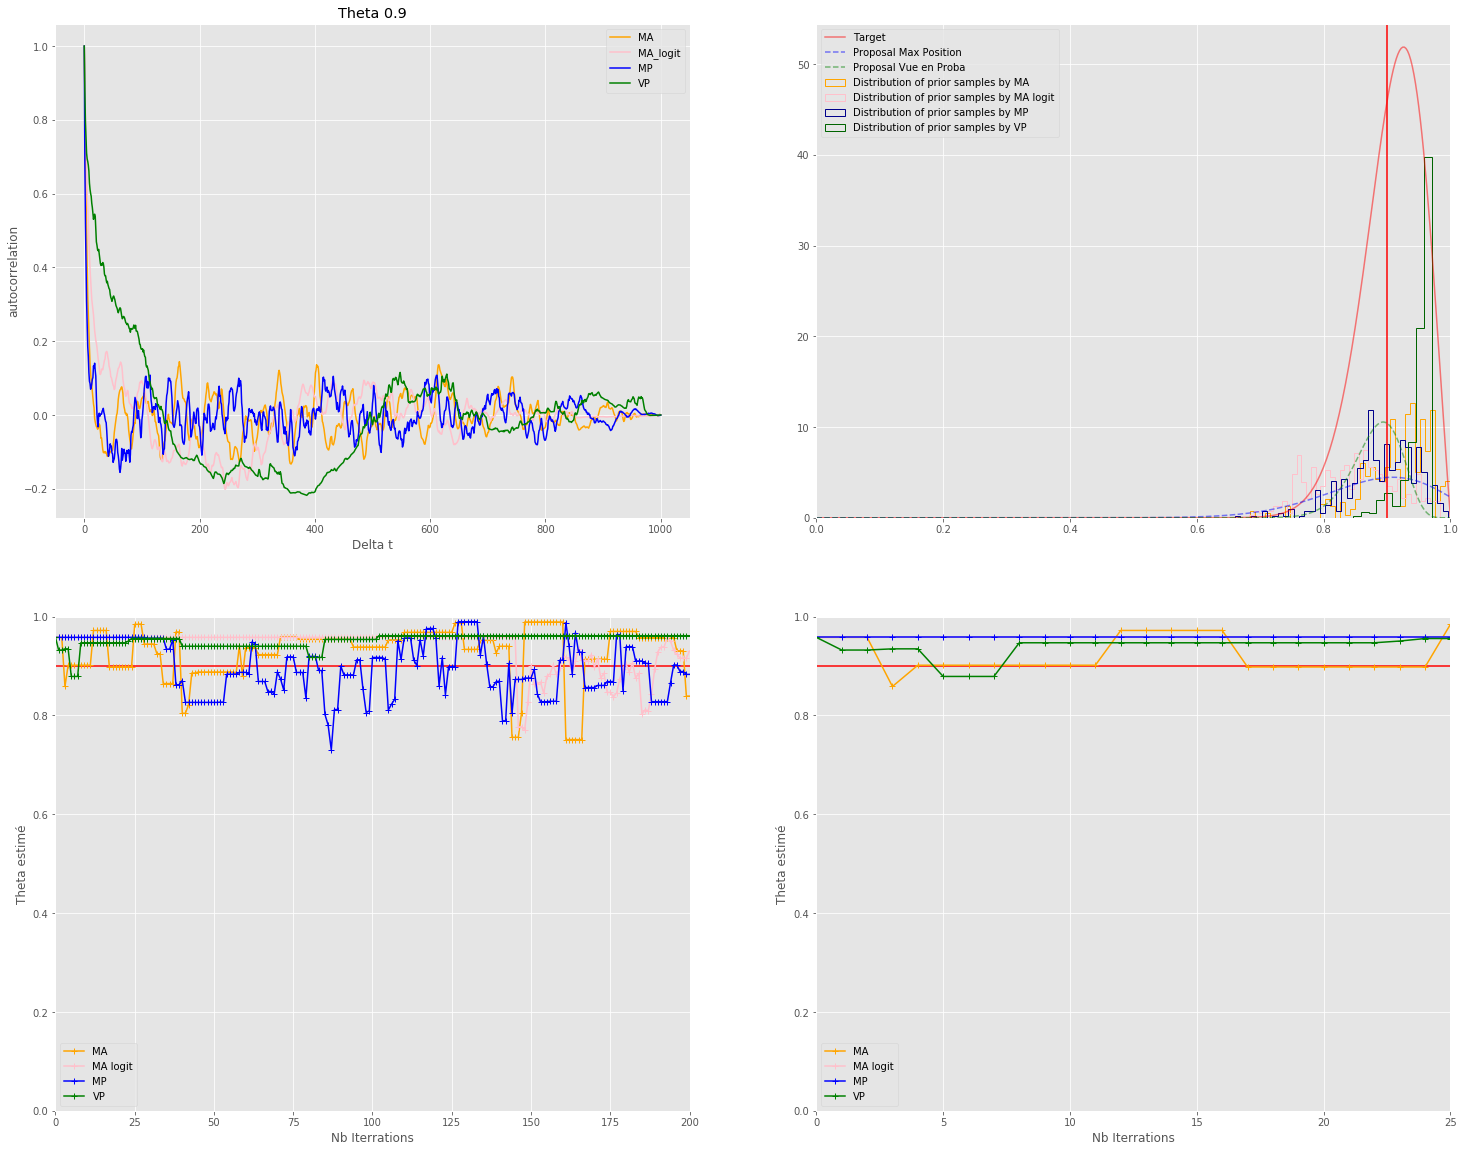

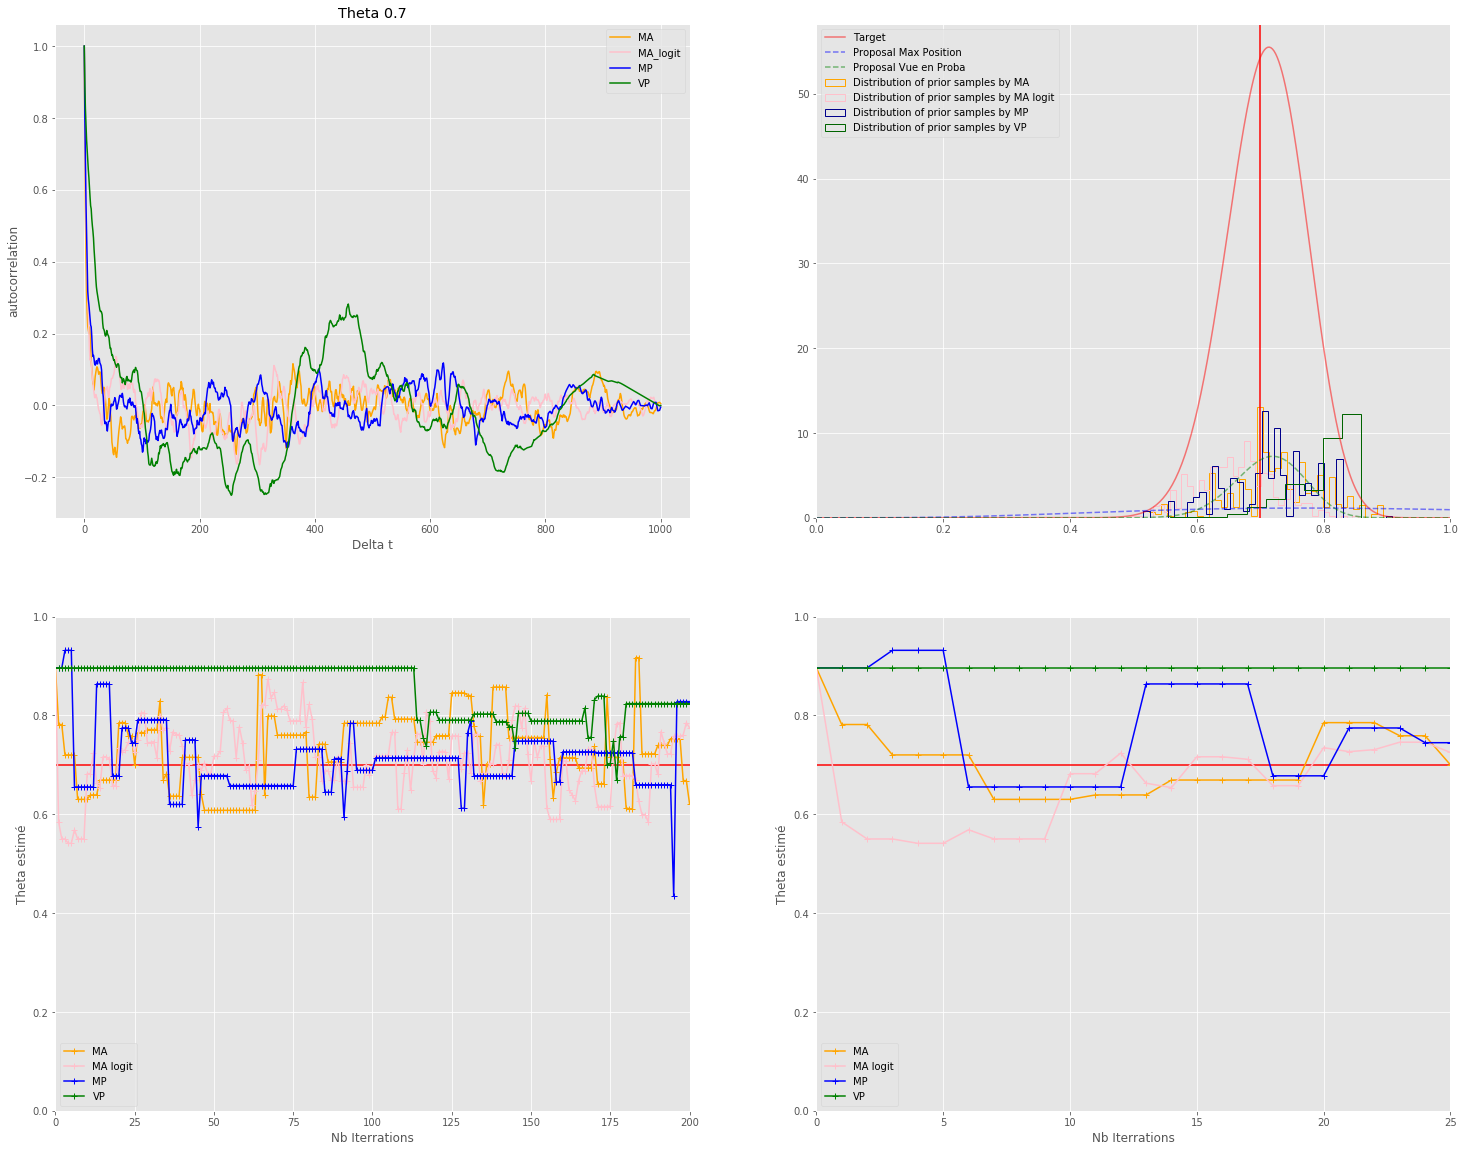

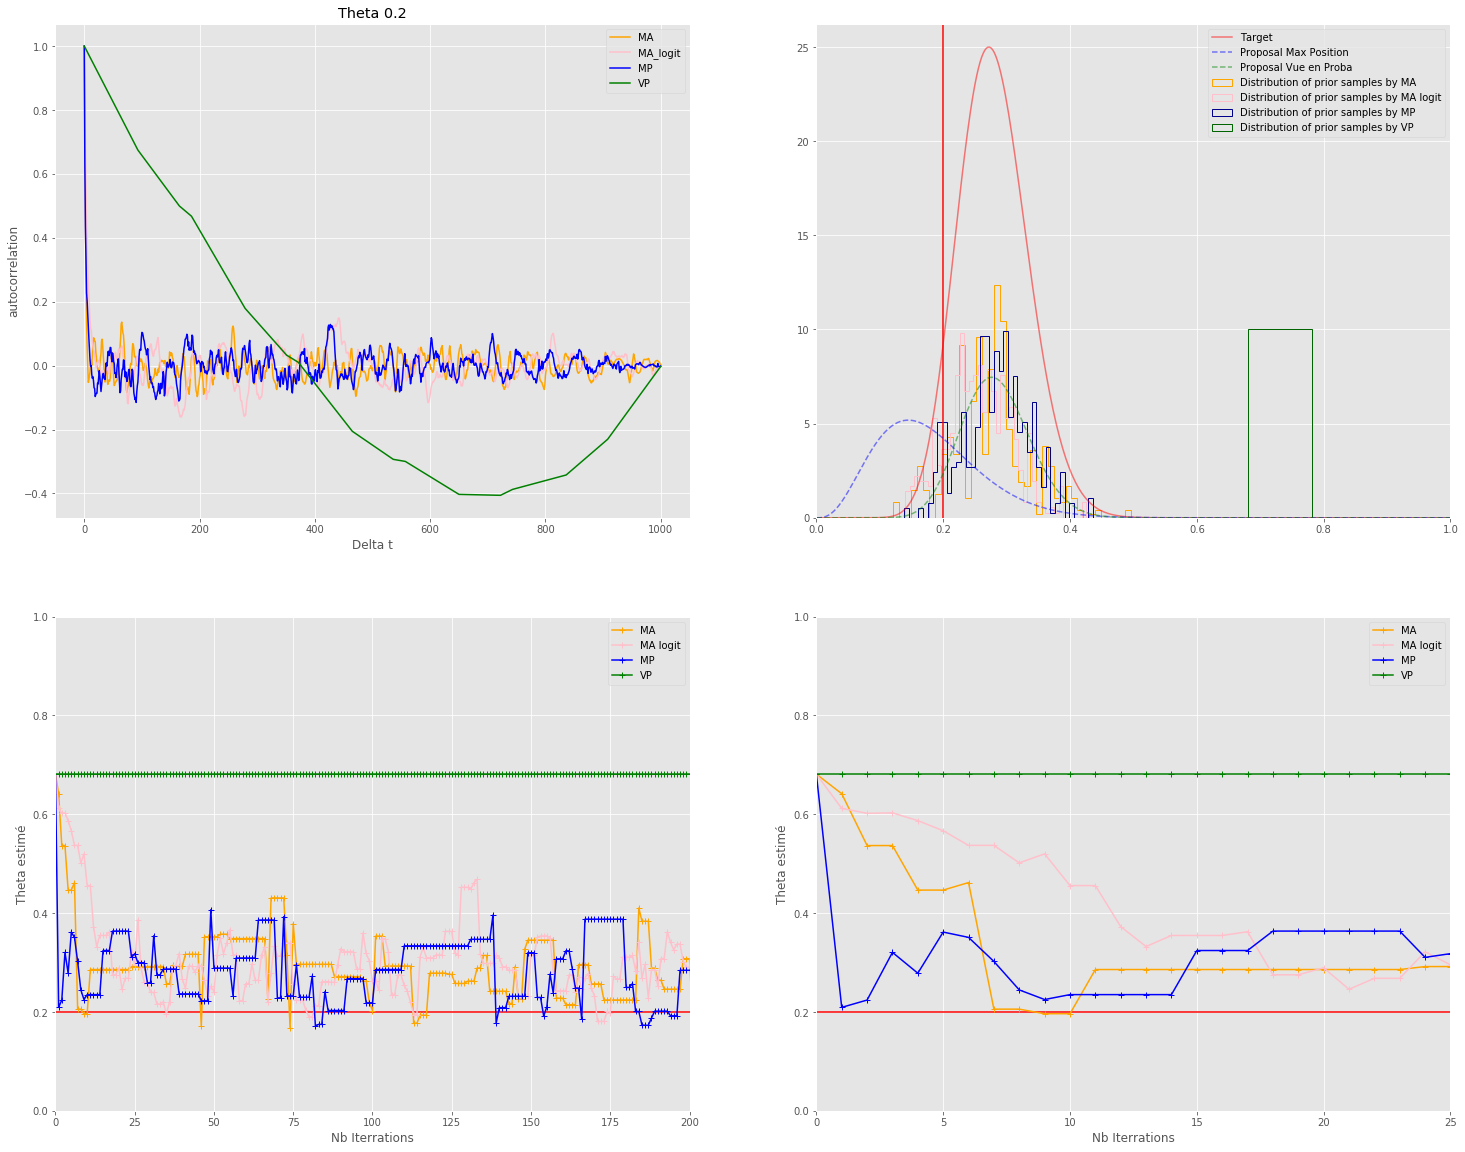

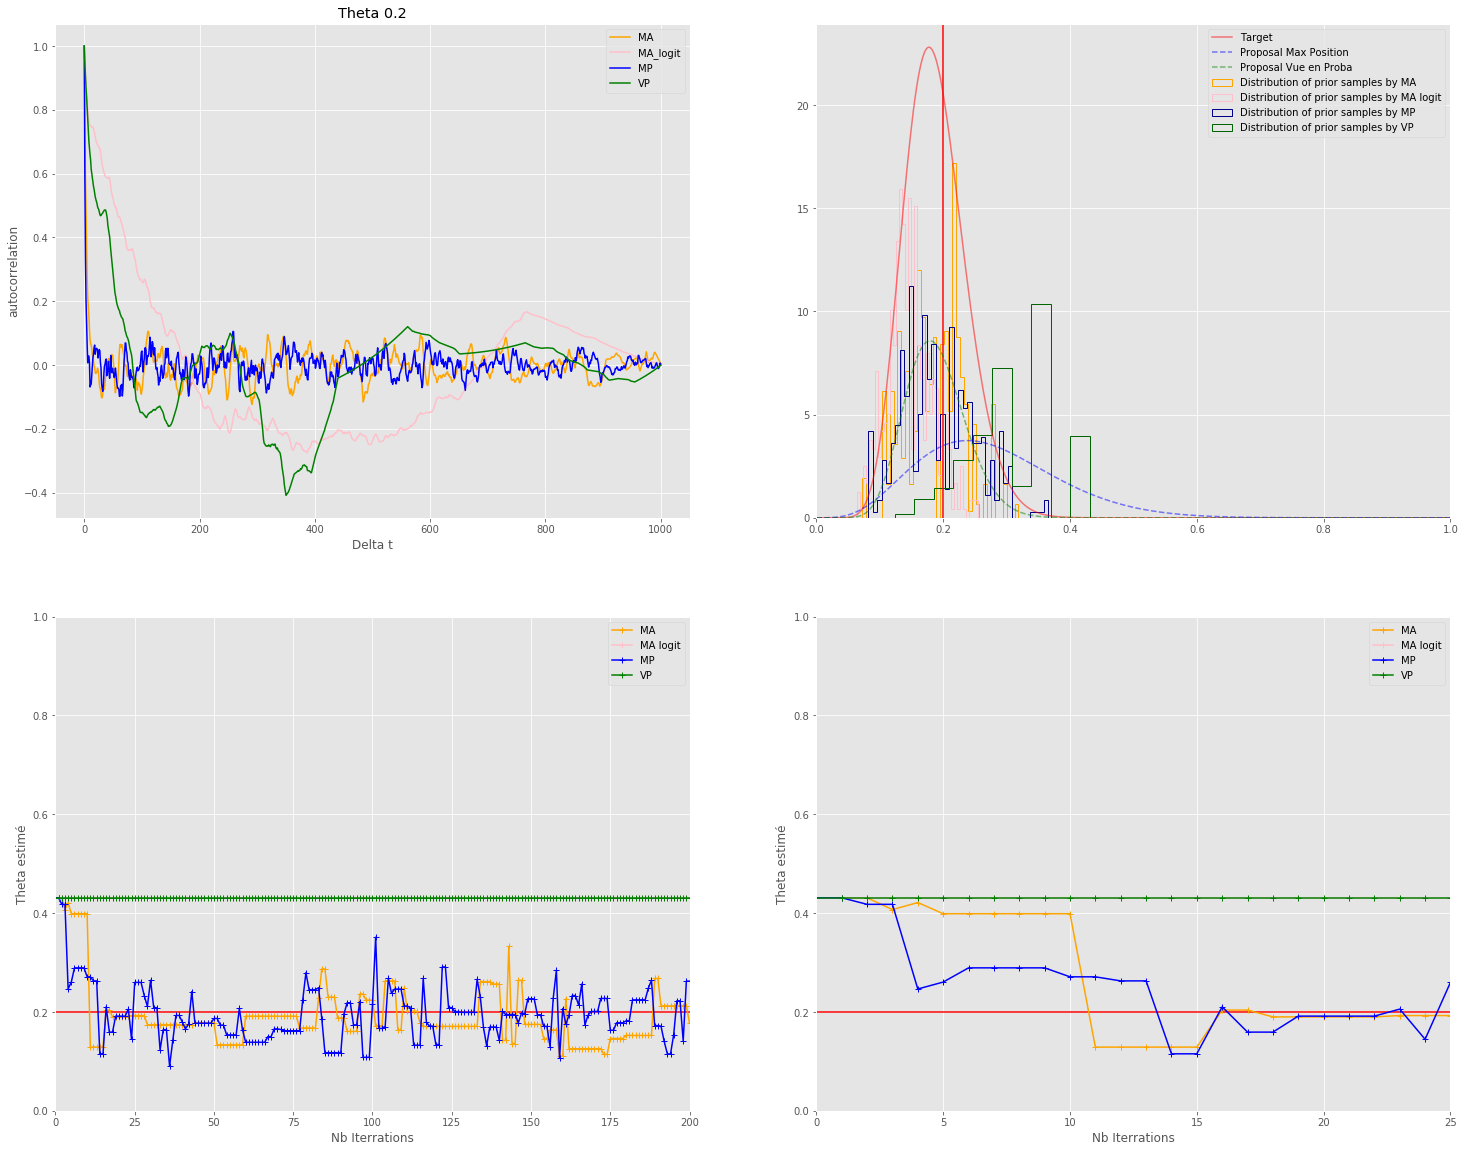

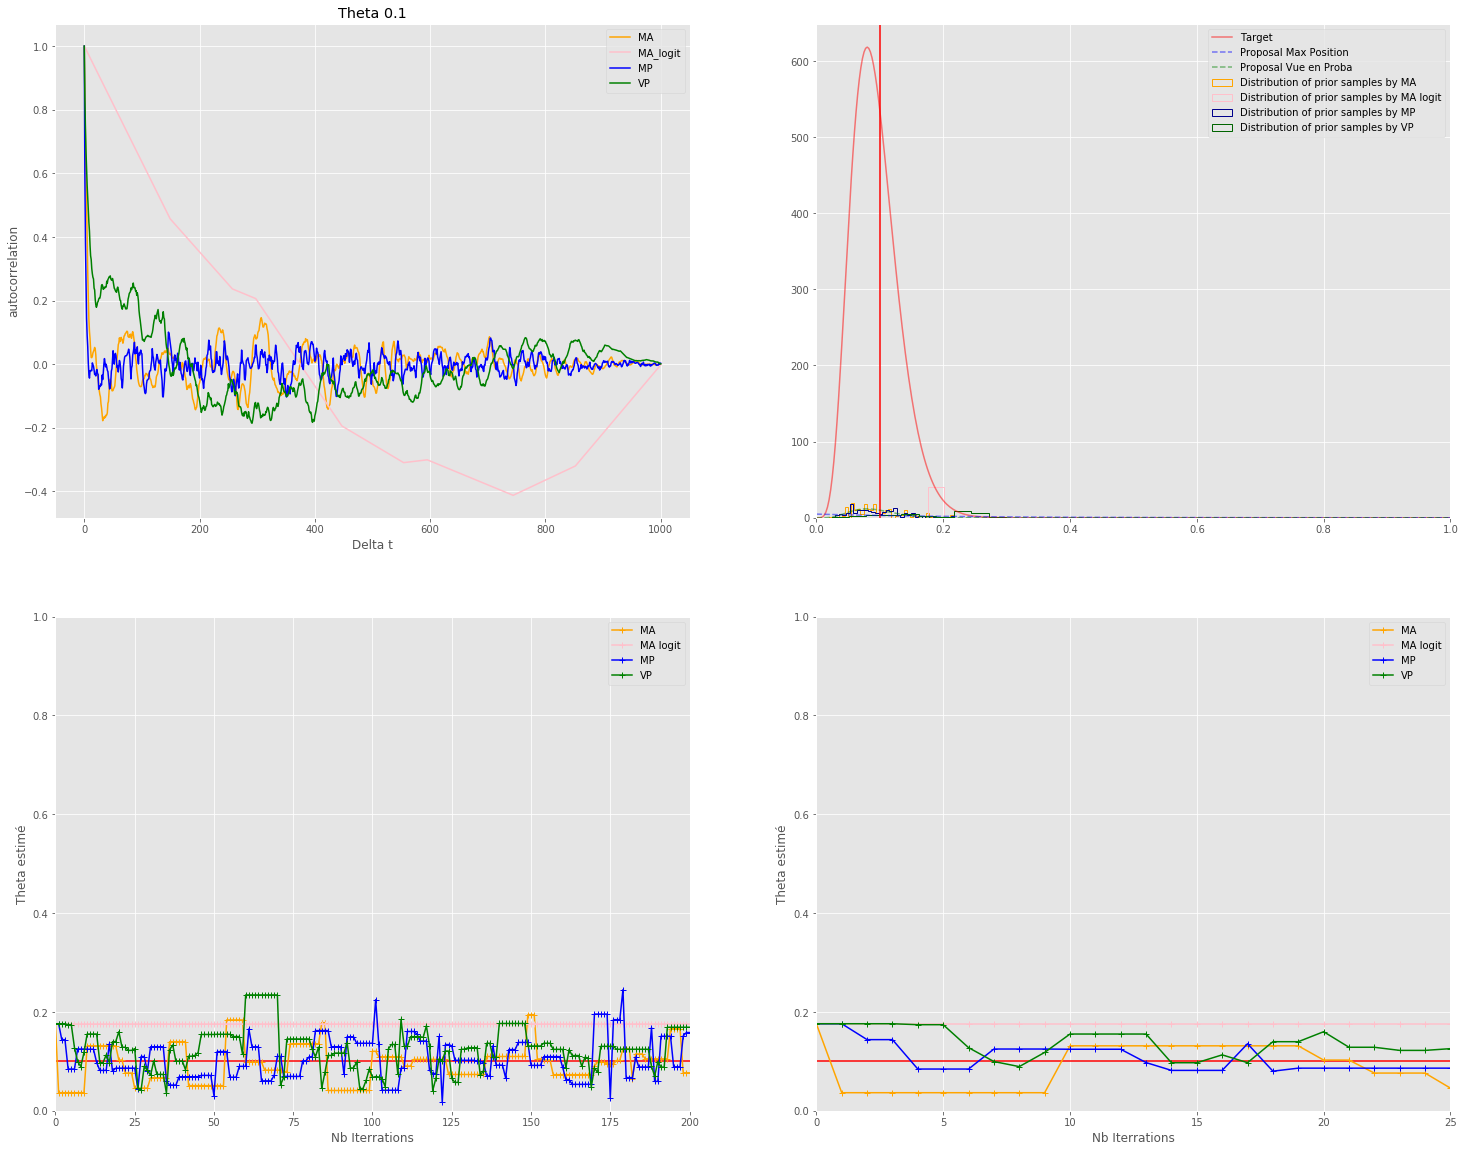

In [64]:
nmcmc = len(thetas_MH_MA_all[0])//2

for i in range(part0[0].shape[0]):
    plt.figure(figsize=(25, 20))
    plt.title('Theta '+str(thetas[i]))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Theta '+str(thetas[i]))
    notrend_samples_MA_theta = detrend(np.array(thetas_MH_MA_all[i]))
    cor = acf(notrend_samples_MA_theta,nlags=1000)
    plt.plot(cor, c ='orange', label ='MA')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    
    plt.title('Theta '+str(thetas[i]))
    notrend_samples_MA_logit_theta = detrend(np.array(thetas_MH_MA_logit_all[i]))
    cor = acf(notrend_samples_MA_logit_theta,nlags=1000)
    plt.plot(cor, c ='pink', label ='MA_logit')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MP_theta = detrend(np.array(thetas_MH_MP_all[i]))
    cor = acf(notrend_samples_MP_theta, nlags=1000)
    plt.plot(cor, c ='blue', label ='MP')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_VP_theta = detrend(np.array(thetas_MH_VP_all[i]))
    cor = acf(notrend_samples_VP_theta, nlags=1000)
    plt.plot(cor, c='green',label ='VP')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    plt.legend()
    
    
    ###Fig Densité
    
    plt.subplot(2,2,2)

    plt.axvline(x=thetas[i], color='r')
    
       
    X_Target_theta3, Y_Target_theta3 = targets_all[i].pdf_multiparticule(particules_plot)
    X_MP_theta3, Y_MP_theta3 = proposals_MP_all[i].pdf_multiparticule(particules_plot)
    X_VP_theta3, Y_VP_theta3 = proposals_VP_all[i].pdf_multiparticule(particules_plot)
    
    plt.plot(X_Target_theta3, Y_Target_theta3, c='red', linestyle='-', alpha=0.5, label='Target')
    plt.plot(X_MP_theta3, Y_MP_theta3, c='blue', linestyle='--', alpha=0.5, label='Proposal Max Position')
    plt.plot(X_VP_theta3, Y_VP_theta3, c='green', linestyle='--', alpha=0.5, label='Proposal Vue en Proba')

    
    plt.hist(thetas_MH_MA_all[i][nmcmc:], 40 ,histtype='step',color = 'orange', density=True, linewidth=1, label='Distribution of prior samples by MA');
    plt.hist(thetas_MH_MA_logit_all[i][nmcmc:], 40 ,histtype='step',color = 'pink', density=True, linewidth=1, label='Distribution of prior samples by MA logit');
    plt.hist(thetas_MH_MP_all[i][nmcmc:], 40 ,histtype='step',color = 'darkblue', density=True, linewidth=1, label='Distribution of prior samples by MP');
    plt.hist(thetas_MH_VP_all[i][nmcmc:] ,histtype='step',color = 'darkgreen', density=True, linewidth=1, label='Distribution of prior samples by VP');

    plt.legend()
    plt.xlim([0,1]);

    
    ###Fig Chemin Particule long
    
    plt.subplot(2,2,3)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=thetas[i], color='r')
    plt.plot(np.array(thetas_MH_MA_all[i]), '-+',c='orange', label='MA')
    plt.plot(np.array(thetas_MH_MA_logit_all[i]), '-+',c='pink', label='MA logit')
    plt.plot(np.array(thetas_MH_MP_all[i]), '-+',c='blue', label='MP')
    plt.plot(np.array(thetas_MH_VP_all[i]), '-+',c='green', label='VP')
    plt.xlim([0, 200])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")
    
    ###Fig Chemin Particule court
    
    plt.subplot(2,2,4)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=thetas[i], color='r')
    plt.plot(np.array(thetas_MH_MA_all[i]), '-+',c='orange', label='MA')
    plt.plot(np.array(thetas_MH_MA_logit_all[i]), '-+',c='pink', label='MA logit')
    plt.plot(np.array(thetas_MH_MP_all[i]), '-+',c='blue', label='MP')
    plt.plot(np.array(thetas_MH_VP_all[i]), '-+',c='green', label='VP')
    plt.xlim([0, 25])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")

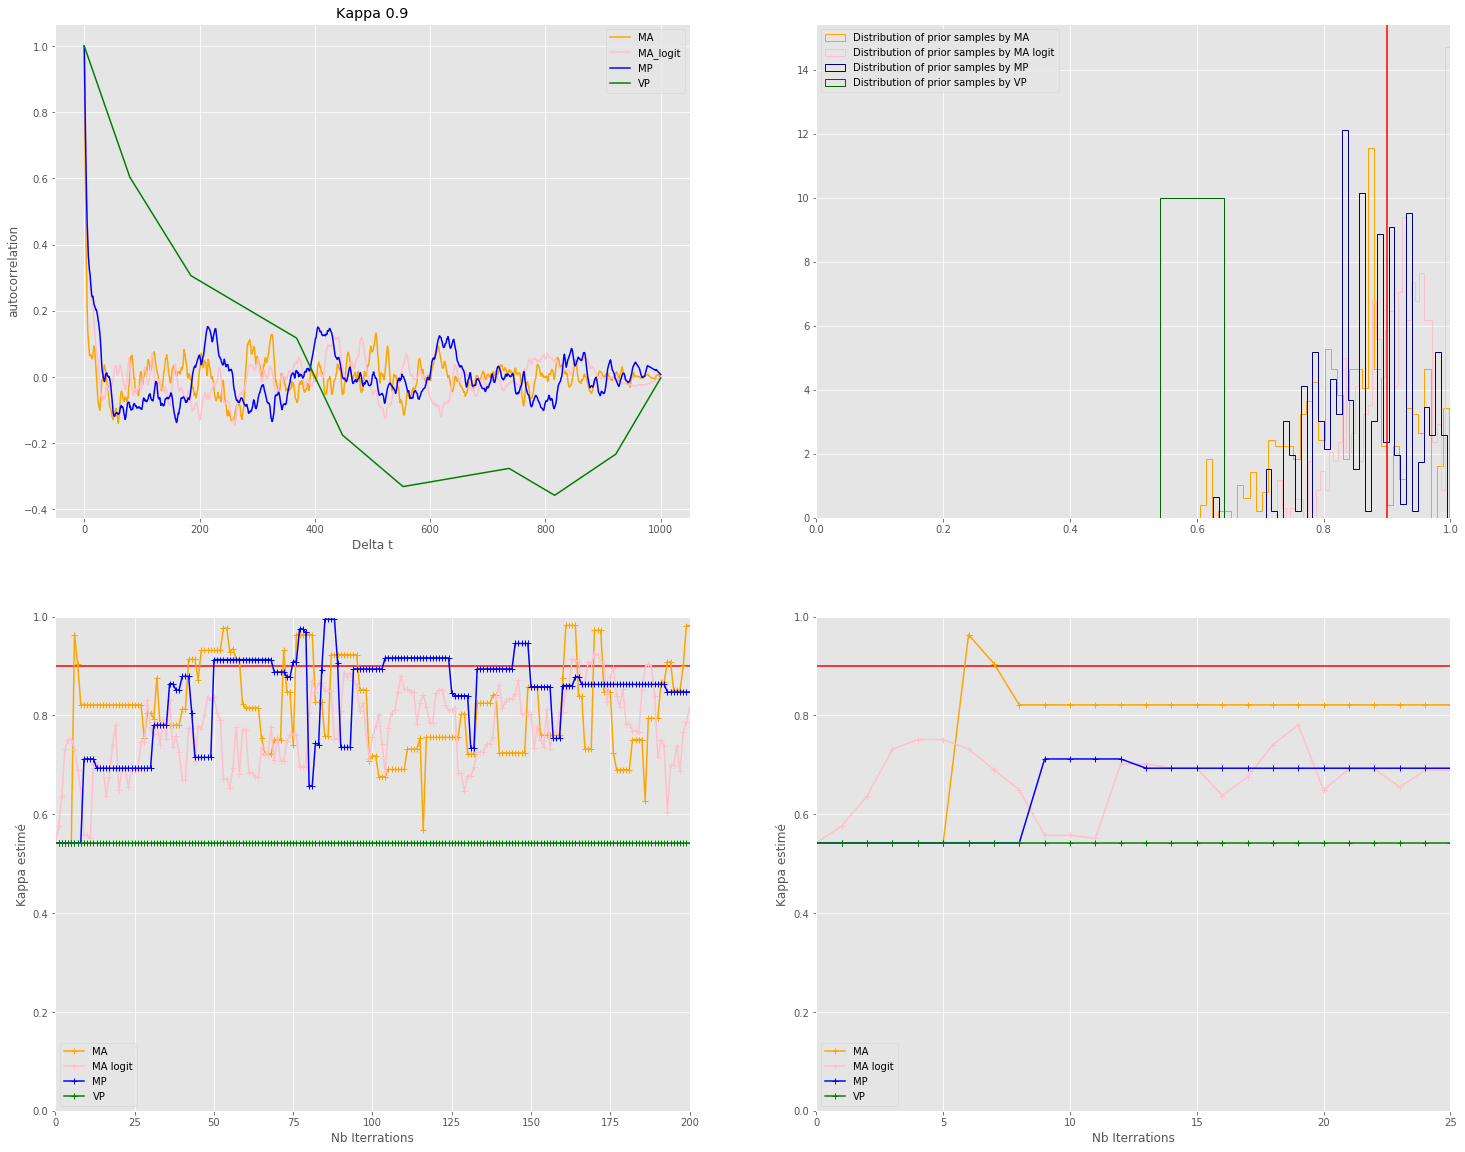

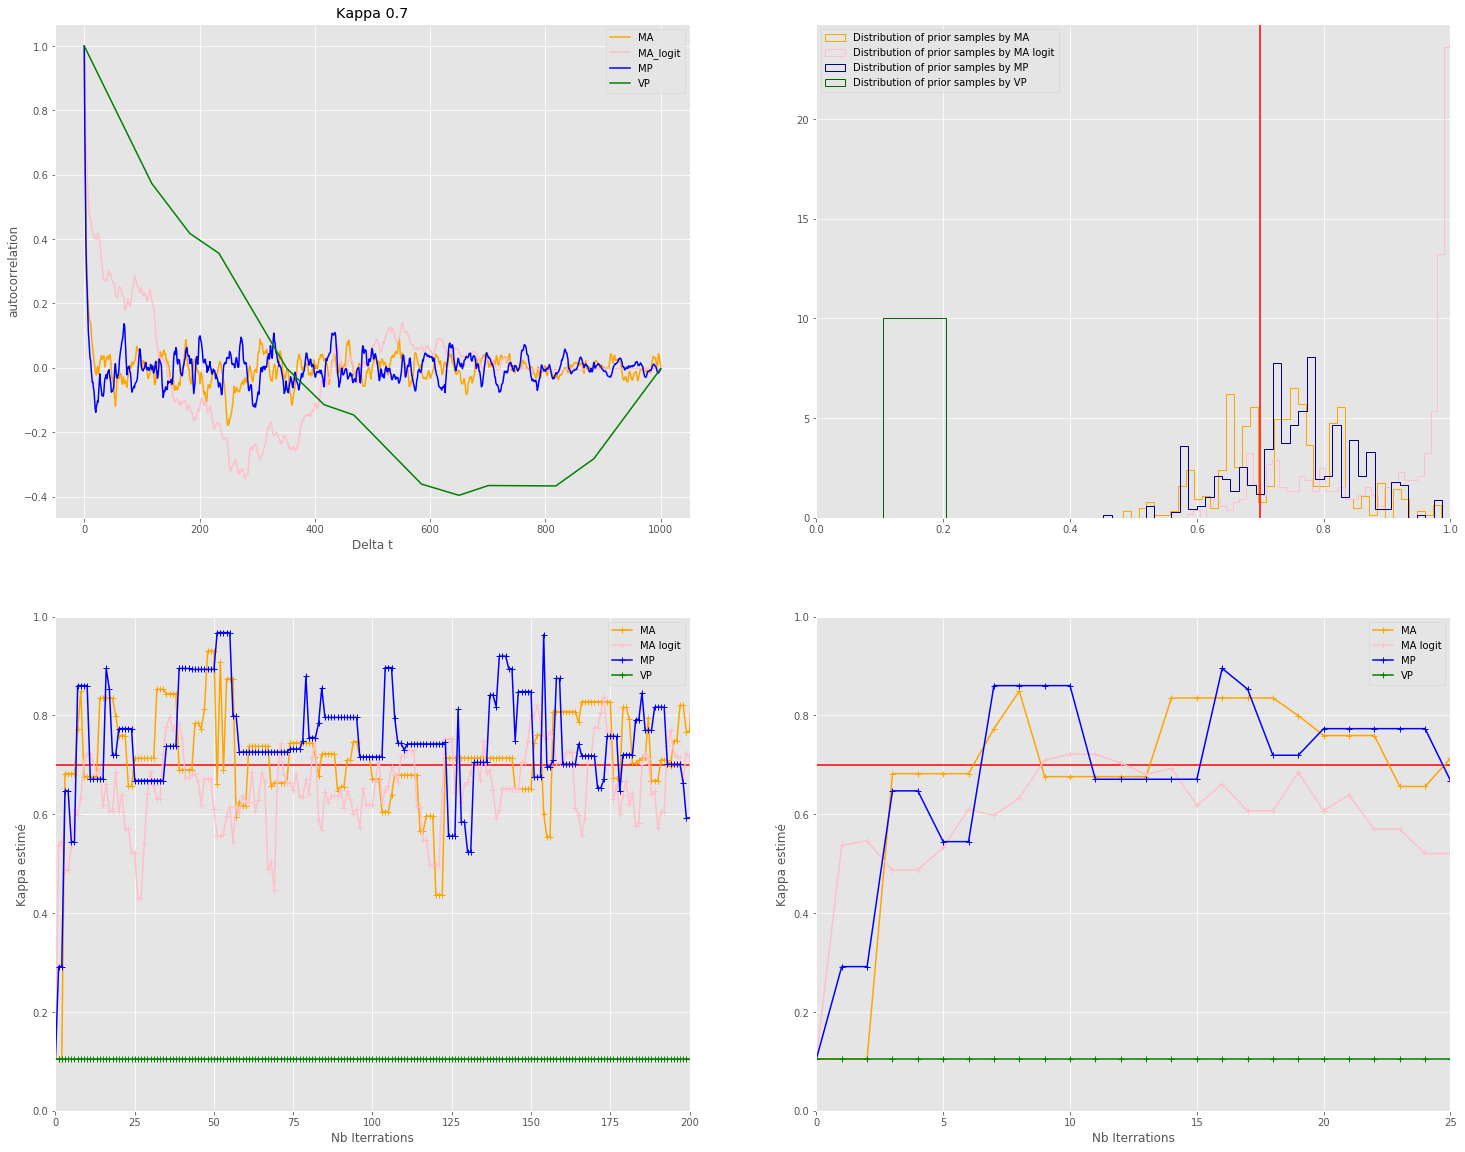

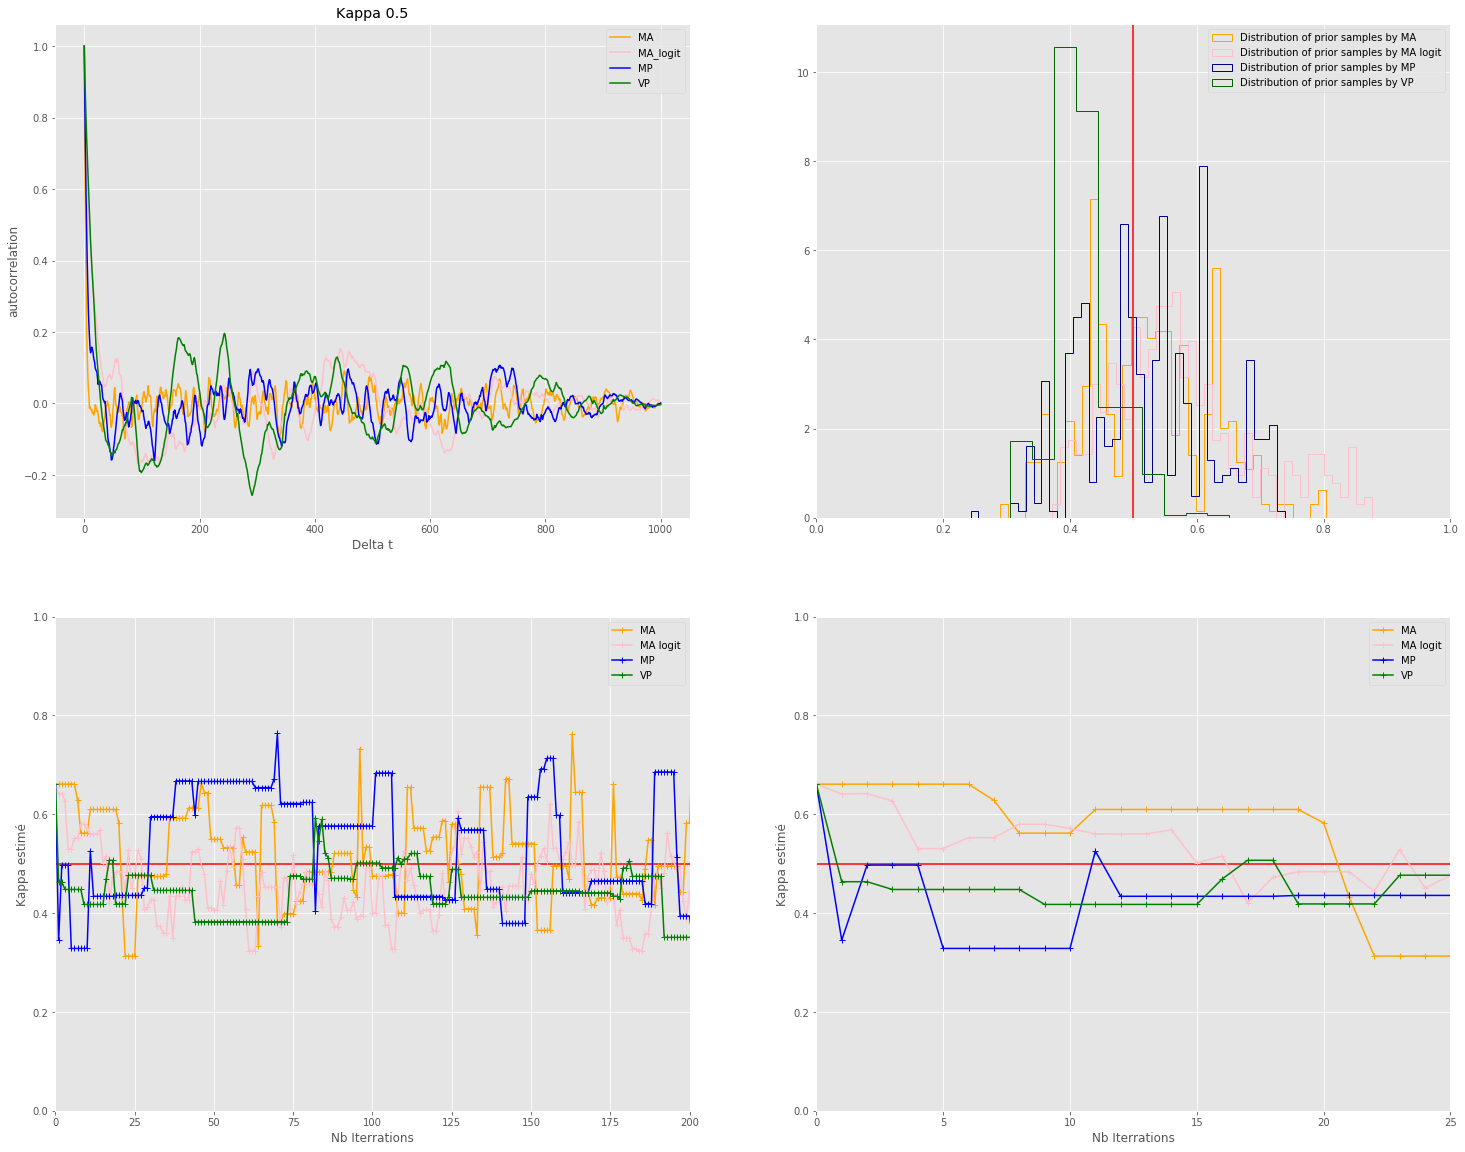

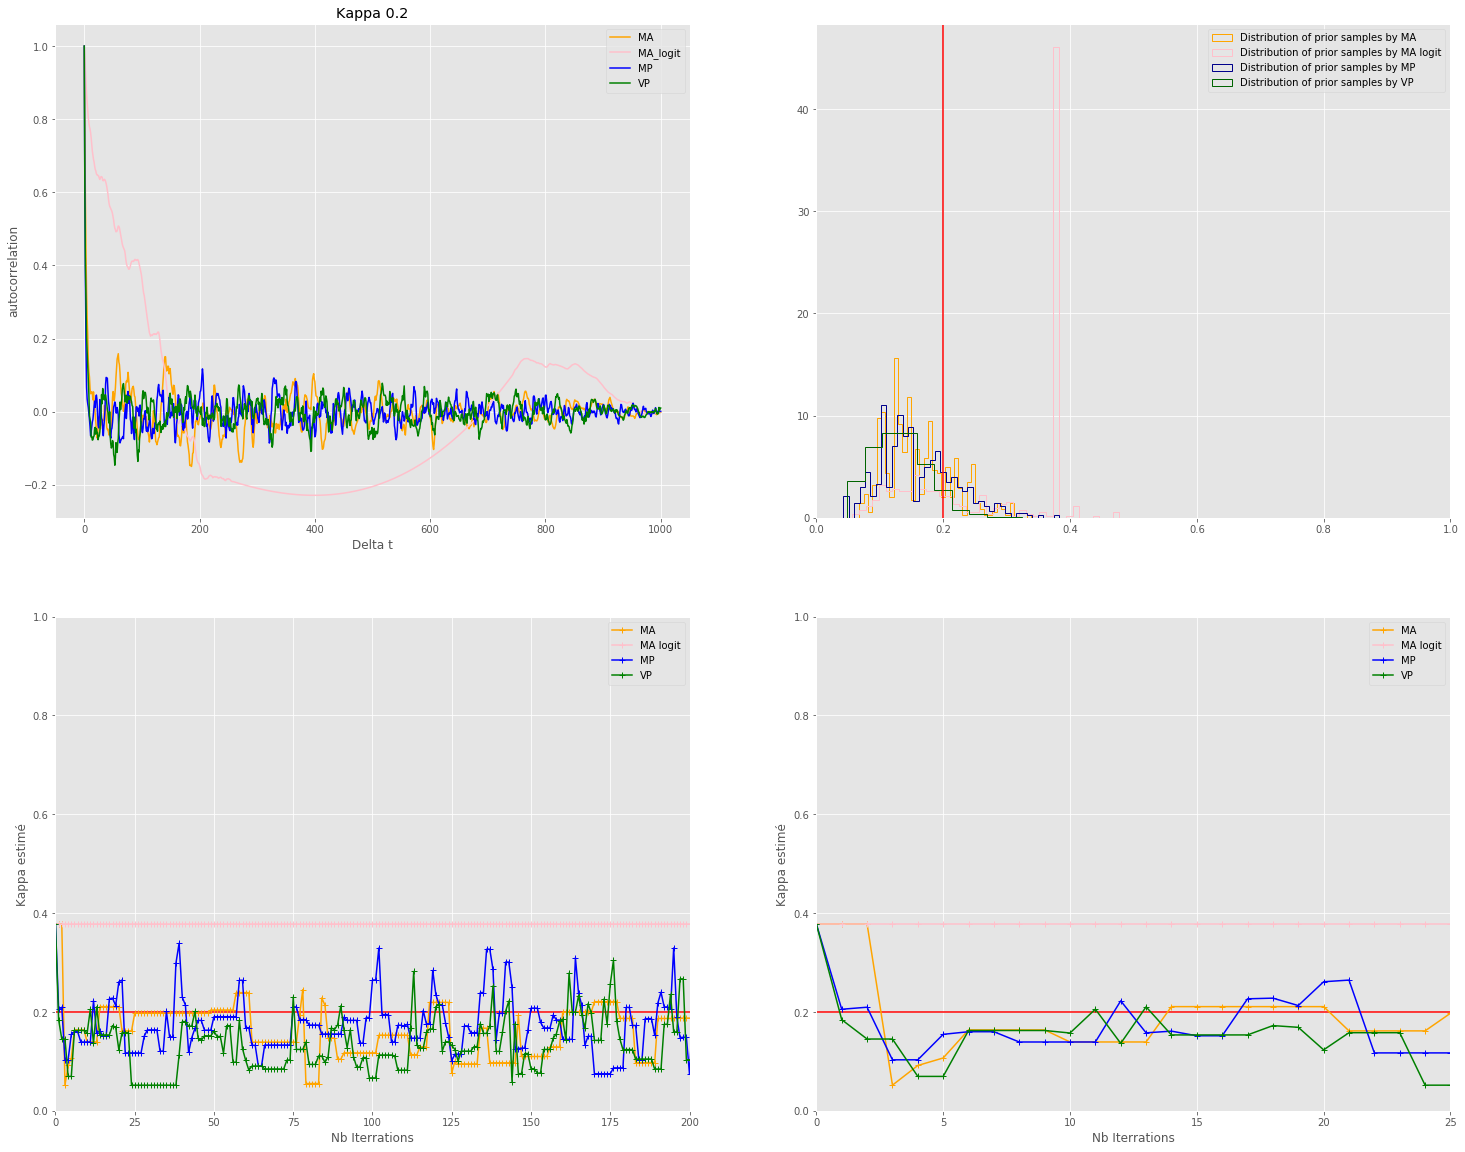

In [65]:
nmcmc = len(kappas_MH_MA_all[0])//2

for i in range(1,part0[1].shape[0]):
    plt.figure(figsize=(25, 20))
    plt.title('Kappa '+str(kappas[i]))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Kappa '+str(kappas[i]))
    notrend_samples_MA_kappas_all = detrend(np.array(kappas_MH_MA_all[i]))
    cor = acf(notrend_samples_MA_kappas_all,nlags=2000)
    plt.plot(cor, c ='orange', label ='MA')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    
    notrend_samples_MA_logit_kappas_all = detrend(np.array(kappas_MH_MA_logit_all[i]))
    cor = acf(notrend_samples_MA_logit_kappas_all,nlags=2000)
    plt.plot(cor, c ='pink', label ='MA_logit')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MP_kappas_all = detrend(np.array(kappas_MH_MP_all[i]))
    cor = acf(notrend_samples_MP_kappas_all, nlags=2000)
    plt.plot(cor, c ='blue', label ='MP')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_VP_kappas_all = detrend(np.array(kappas_MH_VP_all[i]))
    cor = acf(notrend_samples_VP_kappas_all,nlags=2000)
    plt.plot(cor, c='green',label ='VP')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    plt.legend()
    
    
    ###Fig Densité
    
    plt.subplot(2,2,2)
    plt.axvline(x=kappas[i], color='r')


    plt.hist(kappas_MH_MA_all[i][nmcmc:], 40 ,histtype='step',color = 'orange', density=True, linewidth=1, label='Distribution of prior samples by MA');
    plt.hist(kappas_MH_MA_logit_all[i][nmcmc:], 40 ,histtype='step',color = 'pink', density=True, linewidth=1, label='Distribution of prior samples by MA logit');
    plt.hist(kappas_MH_MP_all[i][nmcmc:], 40 ,histtype='step',color = 'darkblue', density=True, linewidth=1, label='Distribution of prior samples by MP');
    plt.hist(kappas_MH_VP_all[i][nmcmc:] ,histtype='step',color = 'darkgreen', density=True, linewidth=1, label='Distribution of prior samples by VP');

    plt.legend()
    plt.xlim([0,1]);

    
    ###Fig Chemin Particule long
    
    plt.subplot(2,2,3)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=kappas[i], color='r')
    plt.plot(np.array(kappas_MH_MA_all[i]), '-+',c='orange', label='MA')
    plt.plot(np.array(kappas_MH_MA_logit_all[i]), '-+',c='pink', label='MA logit')
    plt.plot(np.array(kappas_MH_MP_all[i]), '-+',c='blue', label='MP')
    plt.plot(np.array(kappas_MH_VP_all[i]), '-+',c='green', label='VP')
    plt.xlim([0, 200])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")
    
    ###Fig Chemin Particule court
    
    plt.subplot(2,2,4)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=kappas[i], color='r')
    plt.plot(np.array(kappas_MH_MA_all[i]), '-+',c='orange', label='MA')
    plt.plot(np.array(kappas_MH_MA_logit_all[i]), '-+',c='pink', label='MA logit')
    plt.plot(np.array(kappas_MH_MP_all[i]), '-+',c='blue', label='MP')
    plt.plot(np.array(kappas_MH_VP_all[i]), '-+',c='green', label='VP')
    plt.xlim([0, 25])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")

In [133]:
%time sampless_MA_AR = [Metro_hast (proposals_MA_all, targets_all,[np.ones(5)*theta_init, np.ones(5)*theta_init], 100) for theta_init in np.arange(0.1, 1, 0.2)]
%time sampless_MP_AR = [Metro_hast (proposals_MP_all, targets_all,[np.ones(5)*theta_init, np.ones(5)*theta_init], 100) for theta_init in np.arange(0.1, 1, 0.2)]
%time sampless_VP_AR = [Metro_hast (proposals_VP_all, targets_all,[np.ones(5)*theta_init, np.ones(5)*theta_init], 100) for theta_init in np.arange(0.1, 1, 0.2)]


Wall time: 1min 7s
Wall time: 1min 19s
Wall time: 1min 37s


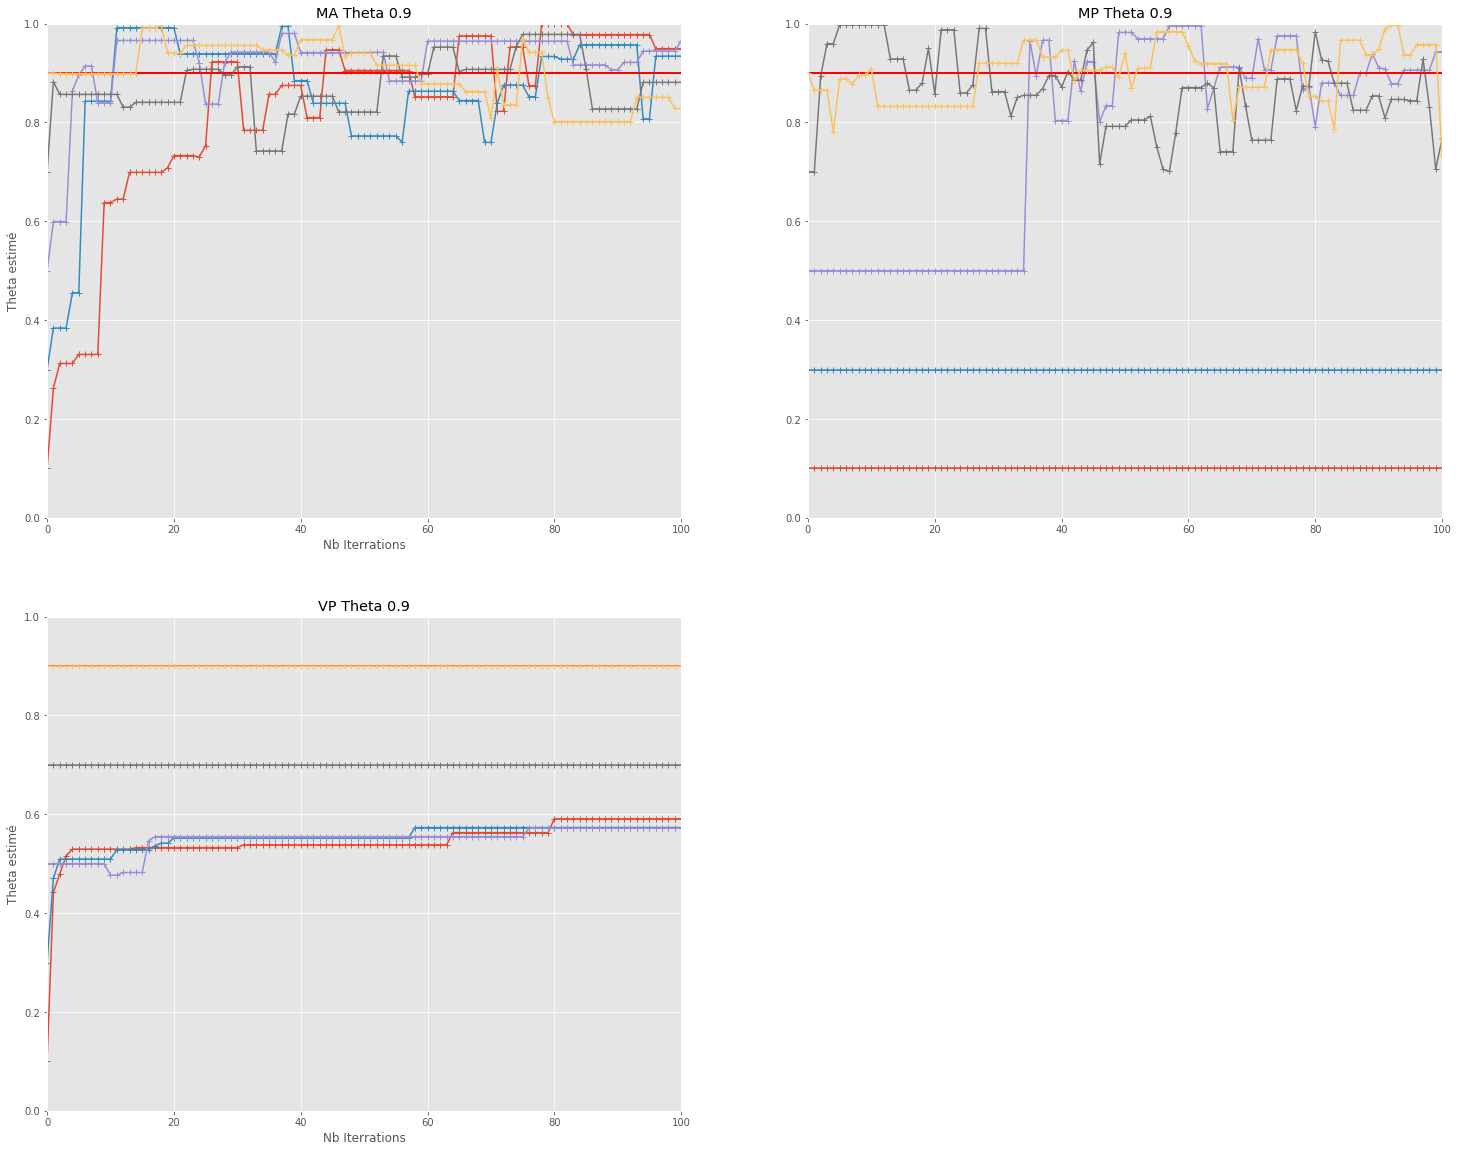

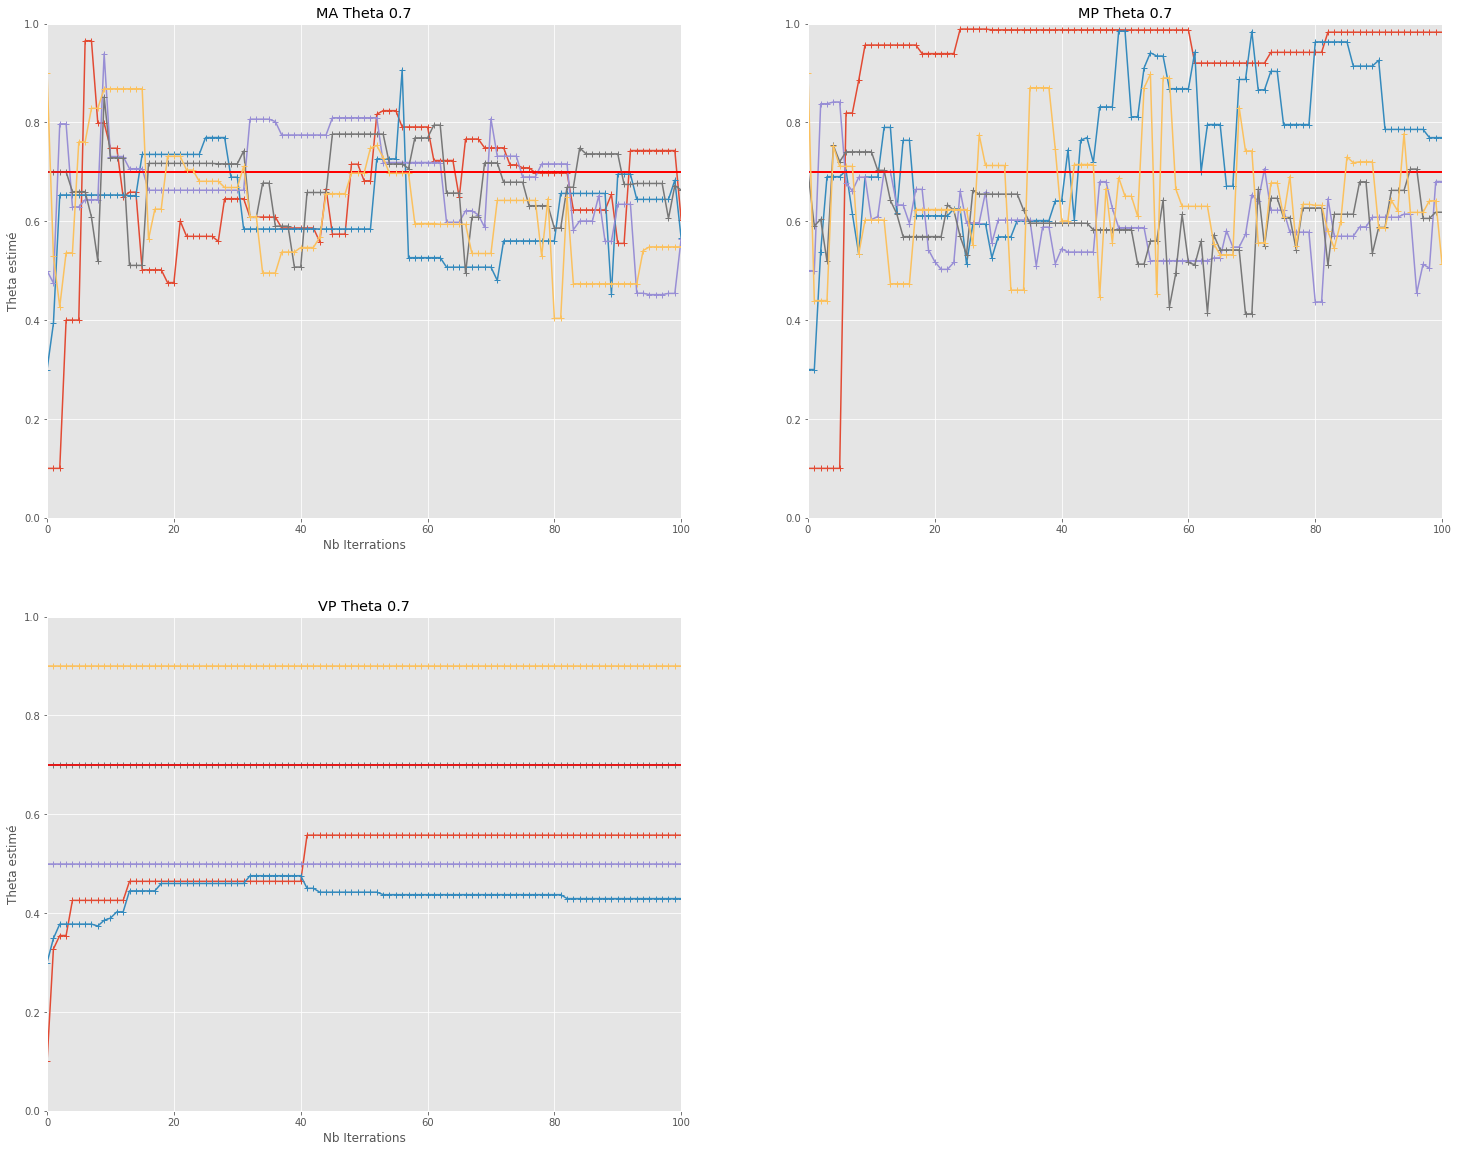

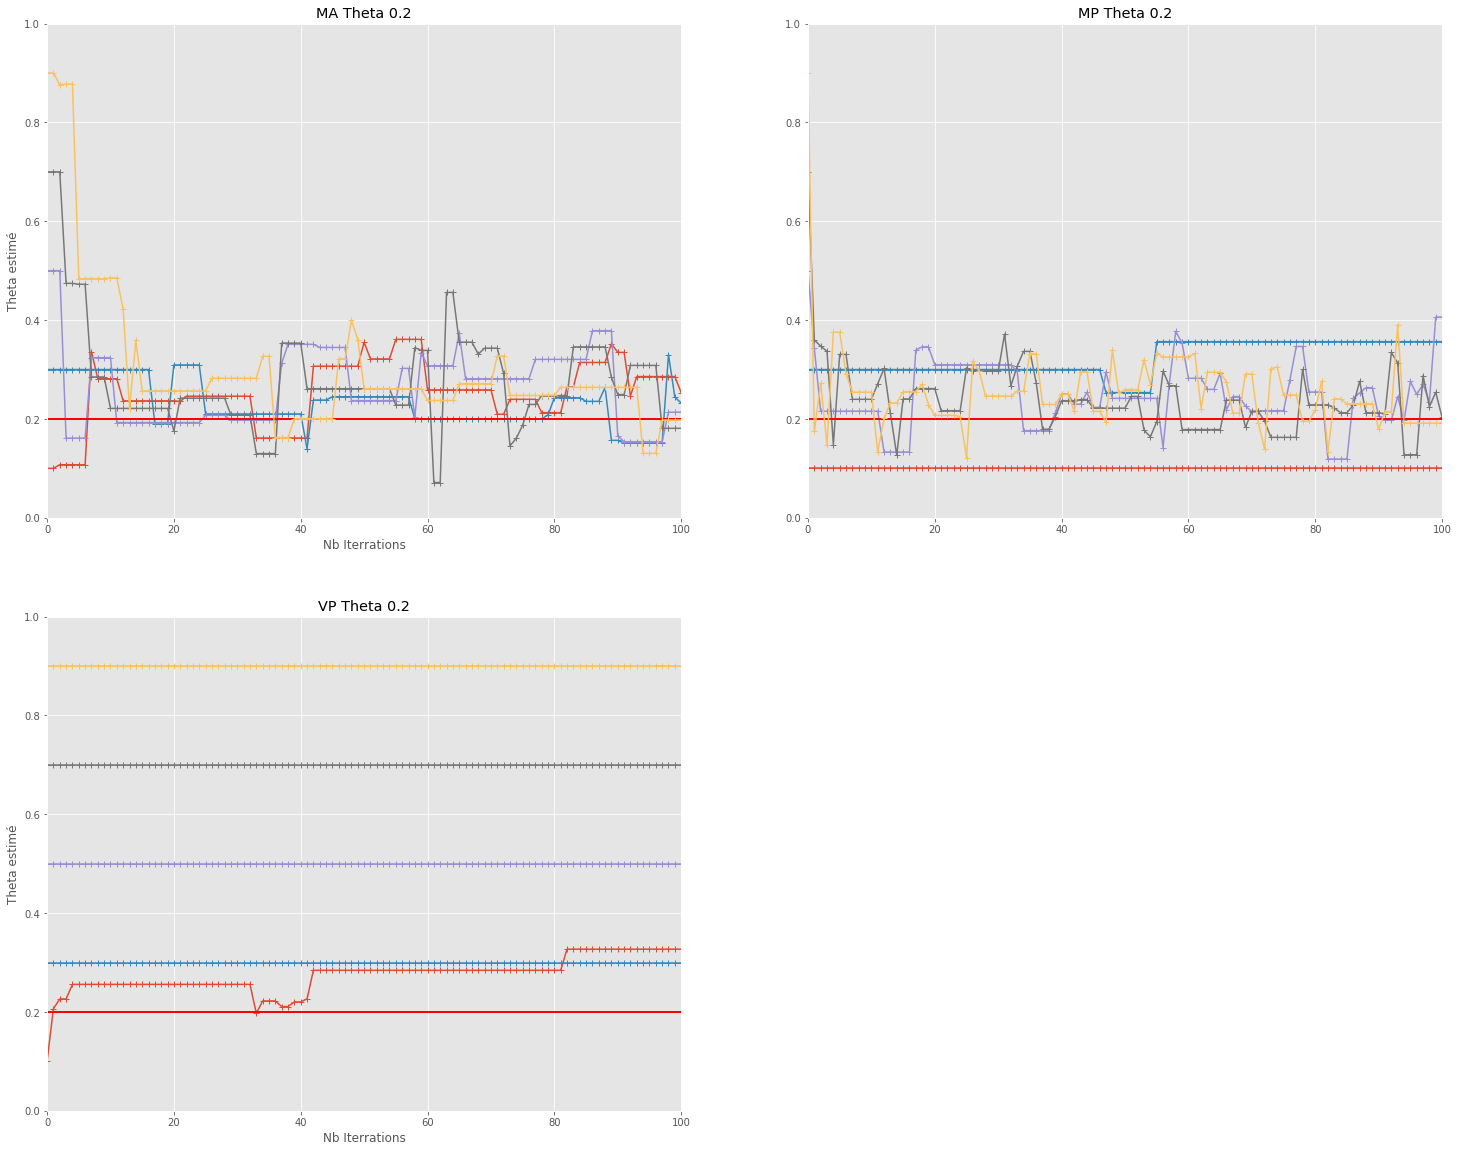

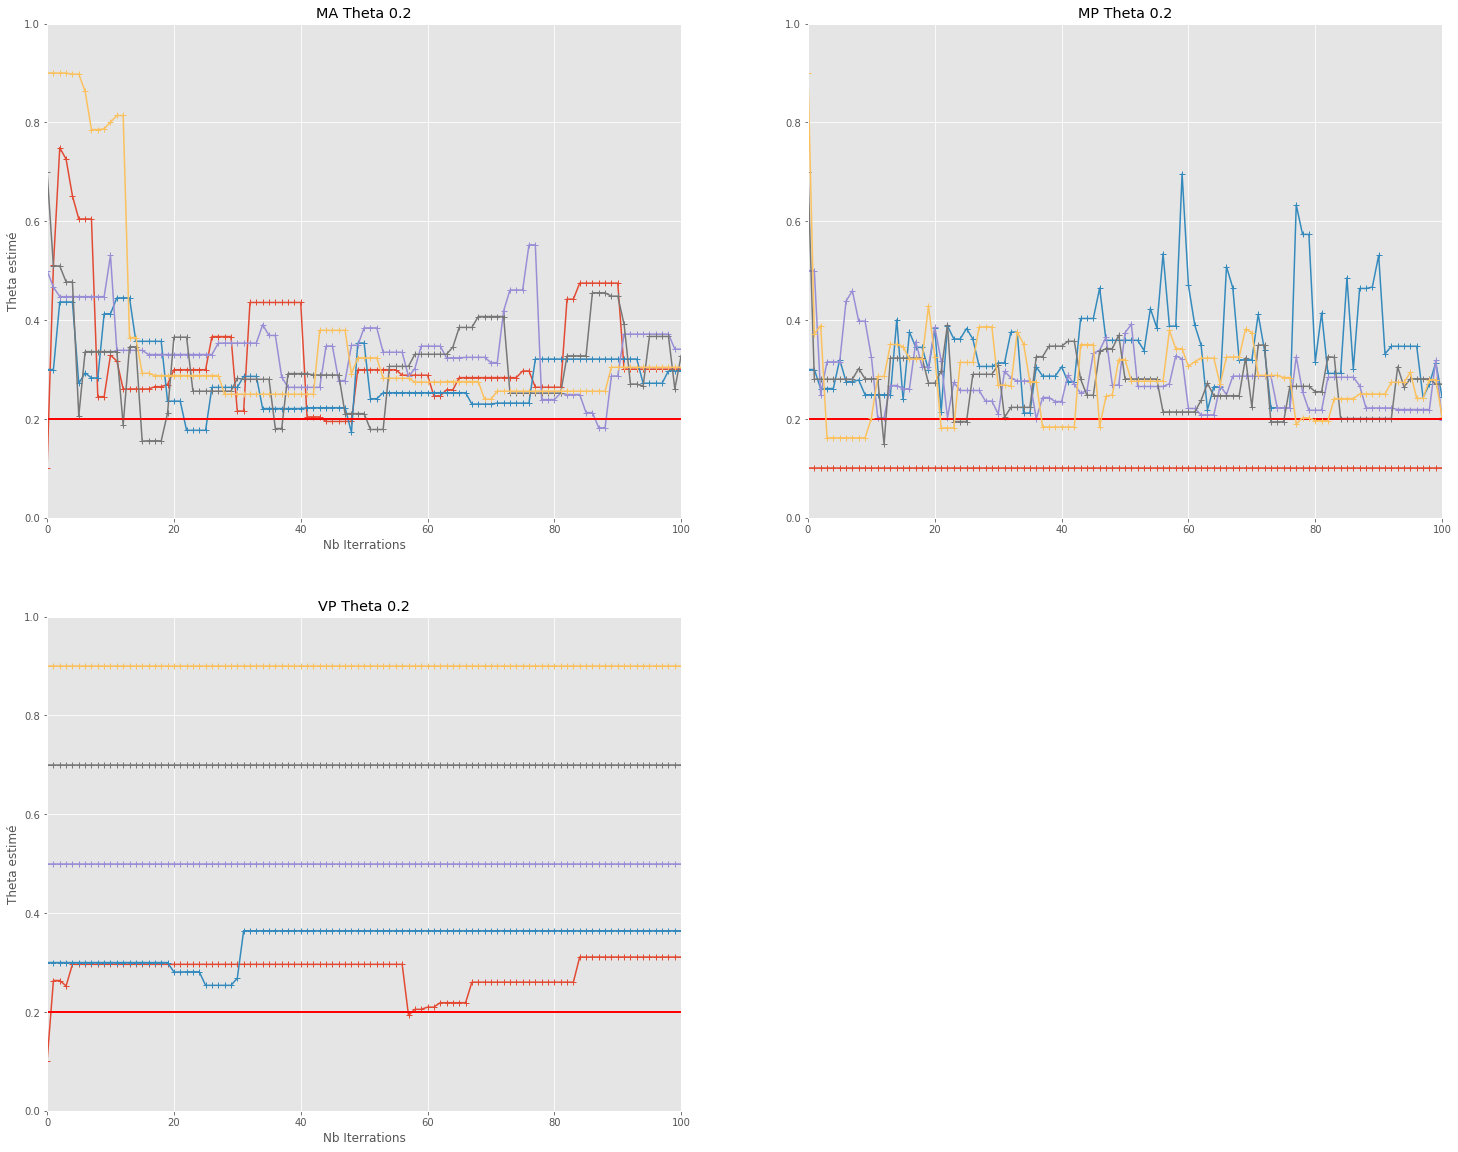

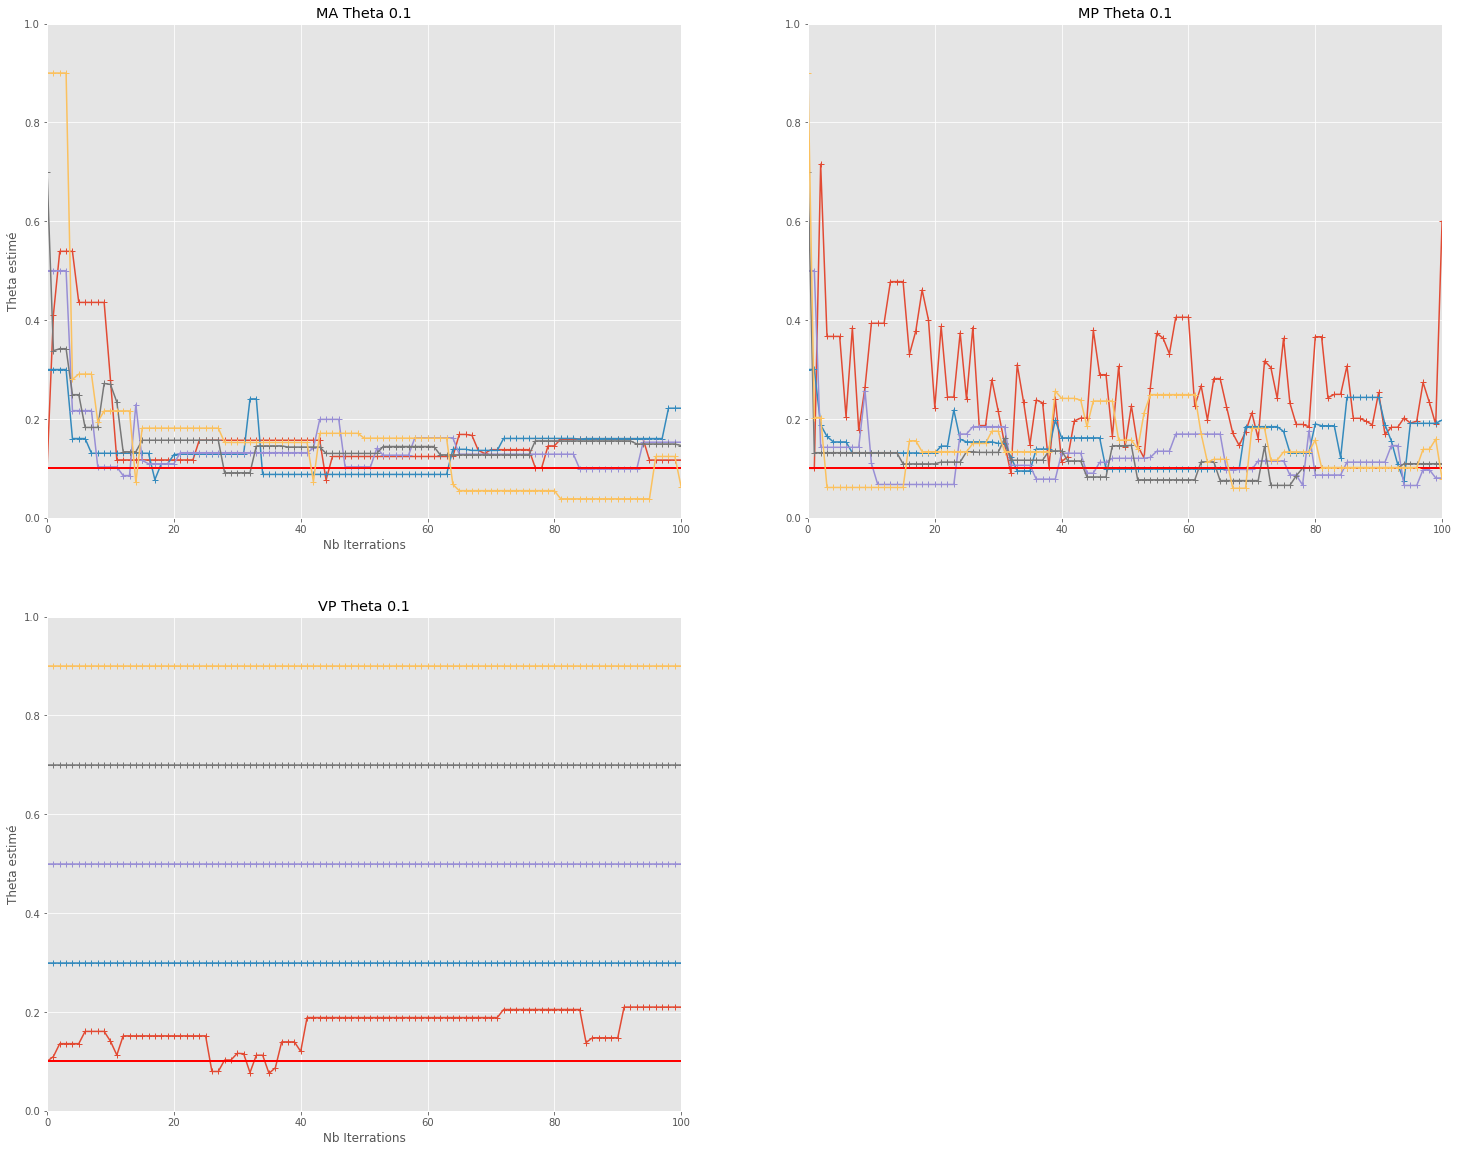

In [163]:
for i in range(part0[0].shape[0]) :
    plt.figure(figsize=(25, 20))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Theta '+ str(thetas[i]))
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")
    for s in range(len(sampless_MA_AR)) :
        plt.axhline(y=thetas[i], color='r')
        plt.title('MA '+'Theta '+ str(thetas[i])) 
        thetas_MH_MA, kappas_MH_MA = split_sample(sampless_MA_AR[s])
        plt.plot(np.array(thetas_MH_MA[i]), '-+')
        plt.xlim([0, 100]);
        plt.ylim([0, 1]);
        
    
    plt.subplot(2,2,2)
    for s in range(len(sampless_MA_AR)) :
        plt.axhline(y=thetas[i], color='r')   
        plt.title('MP '+'Theta '+ str(thetas[i])) 
        thetas_MH_MP, kappas_MH_MP = split_sample(sampless_MP_AR[s])
        plt.plot(np.array(thetas_MH_MP[i]), '-+')
        plt.xlim([0, 100]);
        plt.ylim([0, 1]);
    
    plt.subplot(2,2,3)
    for s in range(len(sampless_MA_AR)) :
        plt.axhline(y=thetas[i], color='r')   
        plt.title('VP '+'Theta '+ str(thetas[i])) 
        thetas_MH_VP, kappas_MH_VP = split_sample(sampless_VP_AR[s])
        plt.plot(np.array(thetas_MH_VP[i]), '-+')
        plt.xlim([0, 100]);
        plt.ylim([0, 1]);
       
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")
        
        

### All_ at once MA

In [145]:
part0 = [np.array([uniform(0, 1) for i  in range(len(thetas))]), np.array([uniform(0, 1) for i  in range(len(kappas))])]
part1 = [np.array([uniform(0, 0.5) for i  in range(len(thetas))]), np.array([uniform(0, 0.5) for i  in range(len(kappas))])]
part2 = [np.array([uniform(0.5, 1) for i  in range(len(thetas))]), np.array([uniform(0.5, 1) for i  in range(len(kappas))])]
print ('part0',part0)
print ('part1',part1)
print ('part2',part2)

part0 [array([0.7862, 0.6432, 0.4168, 0.303 , 0.3579]), array([0.1442, 0.1491, 0.4926, 0.9298, 0.2702])]
part1 [array([0.1767, 0.356 , 0.0257, 0.0004, 0.3898]), array([0.1781, 0.4187, 0.1427, 0.2562, 0.2419])]
part2 [array([0.7995, 0.8878, 0.709 , 0.8816, 0.5876]), array([0.585 , 0.6603, 0.8876, 0.9848, 0.8912])]


In [24]:
part0 = [np.array([uniform(0, 1) for i  in range(len(thetas))]), np.array([uniform(0, 1) for i  in range(len(kappas))])]
part1 = [np.array([uniform(0, 1) for i  in range(len(thetas))]), np.array([uniform(0, 1) for i  in range(len(kappas))])]
part2 = [np.array([uniform(0, 1) for i  in range(len(thetas))]), np.array([uniform(0, 1) for i  in range(len(kappas))])]
print ('part0',part0)
print ('part1',part1)
print ('part2',part2)

part0 [array([0.5339, 0.2589, 0.0476, 0.8934, 0.8388]), array([0.214 , 0.975 , 0.3755, 0.3282, 0.8976])]
part1 [array([0.064 , 0.41  , 0.0035, 0.2188, 0.3877]), array([0.4832, 0.6217, 0.9492, 0.6792, 0.8642])]
part2 [array([0.6177, 0.3612, 0.2976, 0.0671, 0.508 ]), array([0.0103, 0.3379, 0.1325, 0.588 , 0.8739])]


In [146]:
proposals_MA = [Proposal_MA(on_theta=True, k=i) for i in range(part0[0].shape[0])] + [Proposal_MA(on_theta=False, k=i) for i in range(part0[1].shape[0])]
targets = [Target(dict_multi, i) for i in range(part0[0].shape[0])] + [Target(dict_multi, k=i,on_theta=False) for i in range(part0[1].shape[0])]


In [147]:
%time samples_MA_0 = Metro_hast (proposals_MA, targets, part0, 1000, True )

[0.187 0.326 0.211 0.255 0.187 0.311 0.25  0.361 0.325 0.219]
Wall time: 2min 26s


In [148]:
%time samples_MA_1 = Metro_hast (proposals_MA, targets, part1, 1000, True )

[0.198 0.301 0.238 0.246 0.167 0.294 0.226 0.358 0.325 0.225]
Wall time: 2min 7s


In [149]:
%time samples_MA_2 = Metro_hast (proposals_MA, targets, part2, 1000, True )

[0.203 0.272 0.209 0.233 0.172 0.305 0.262 0.358 0.32  0.205]
Wall time: 2min 14s


In [150]:
thetas_MH_MA_0 , kappas_MH_MA_0 = split_sample(samples_MA_0)
thetas_MH_MA_1 , kappas_MH_MA_1 = split_sample(samples_MA_1)
thetas_MH_MA_2 , kappas_MH_MA_2 = split_sample(samples_MA_2)


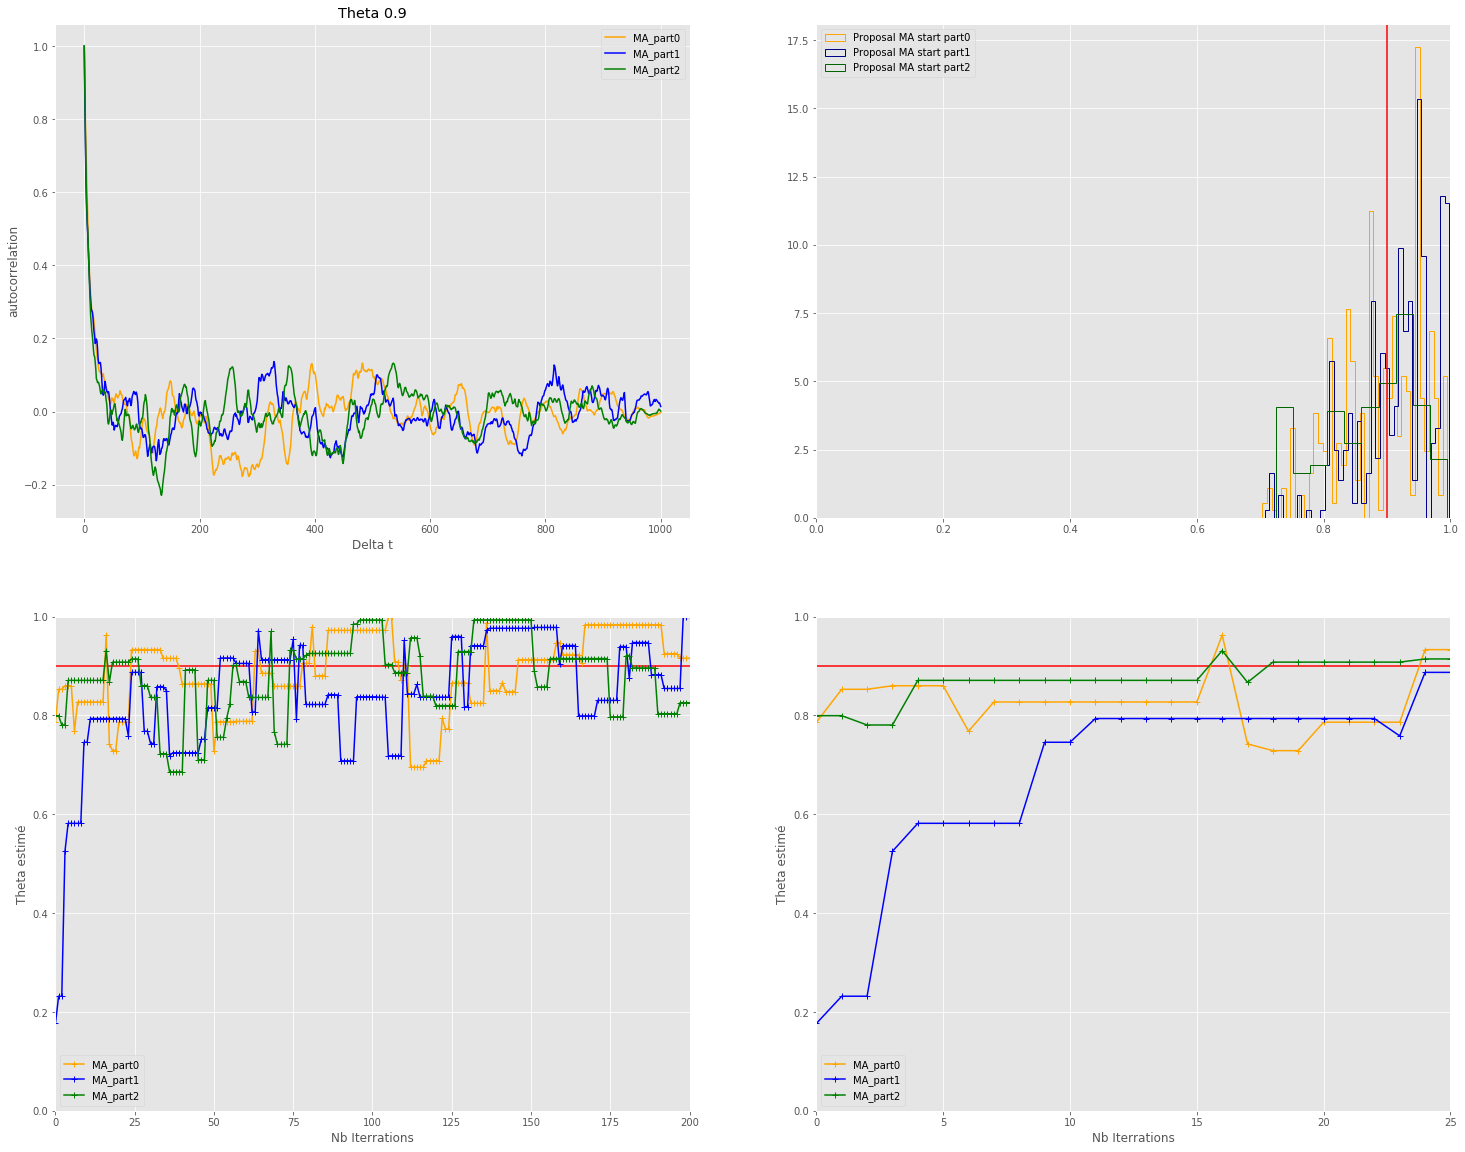

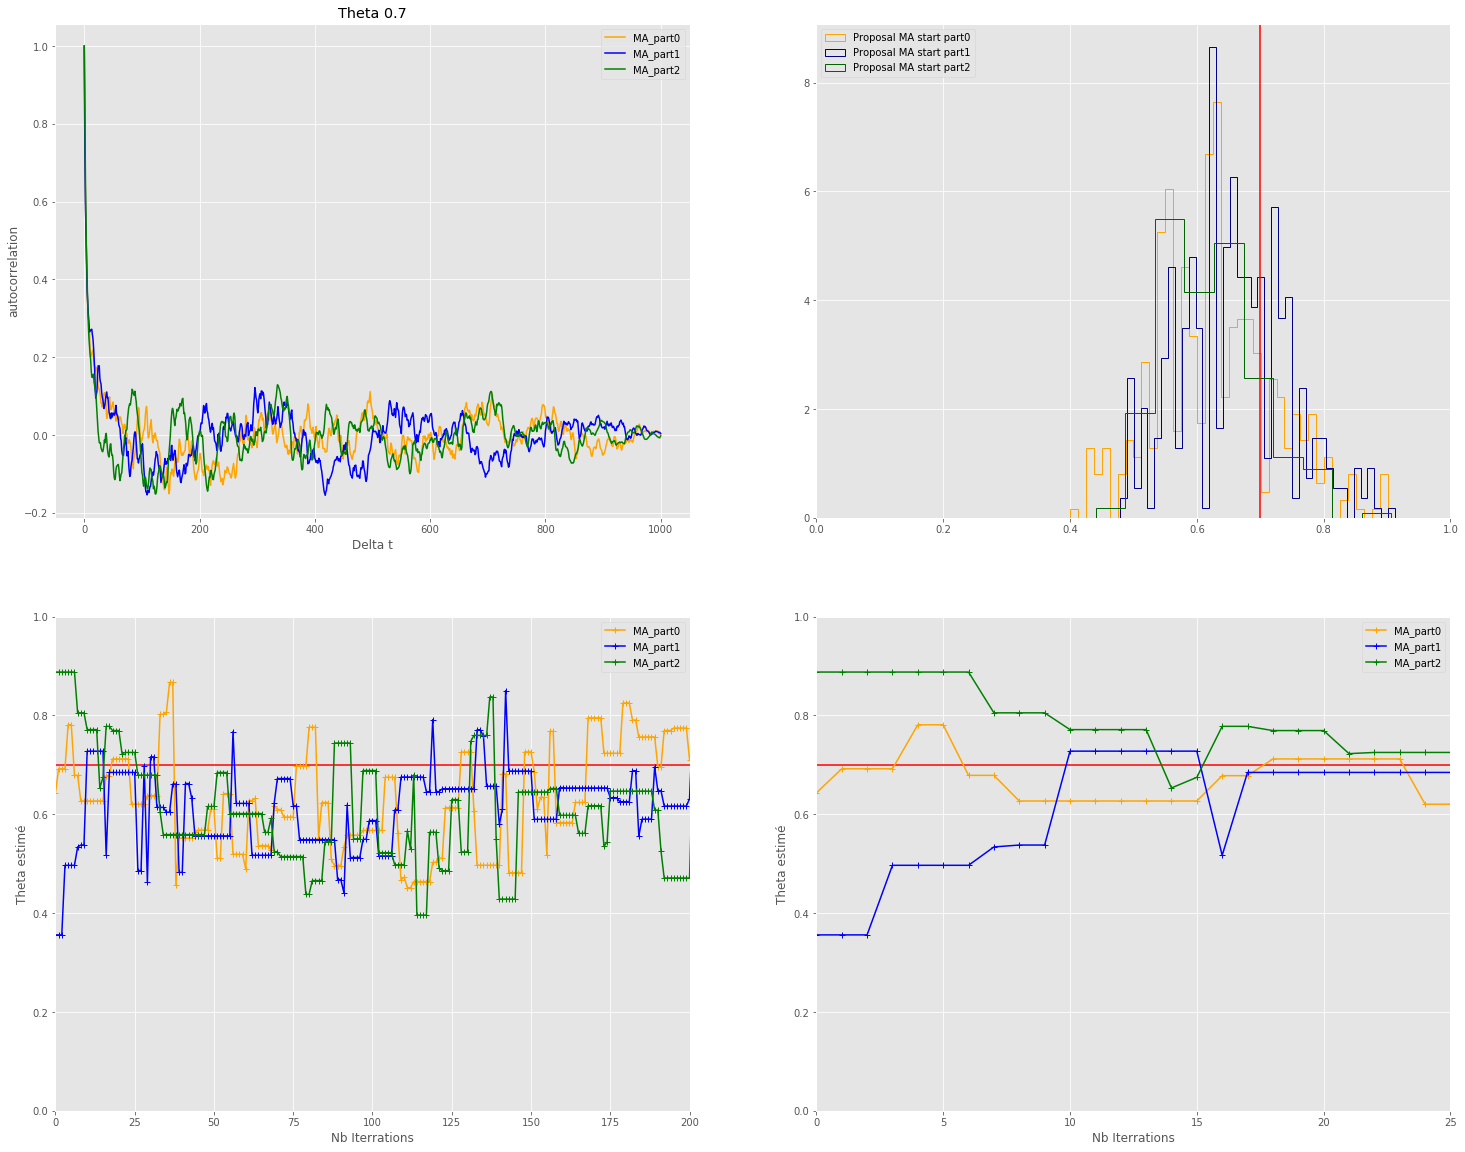

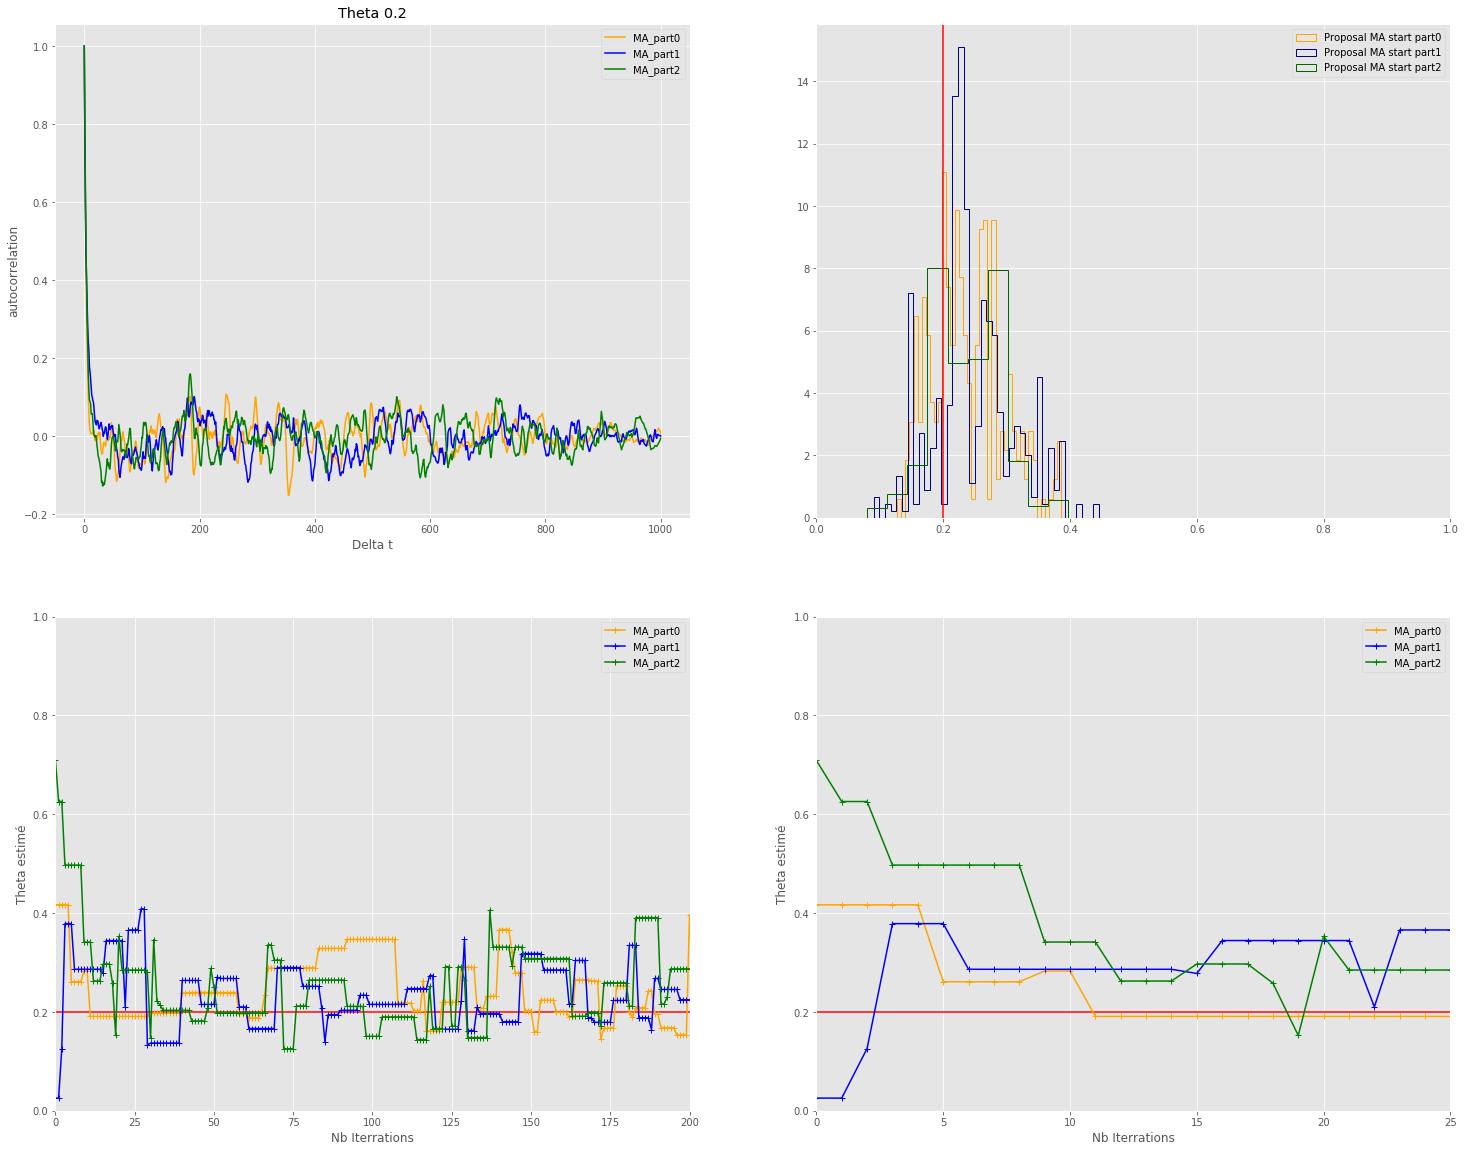

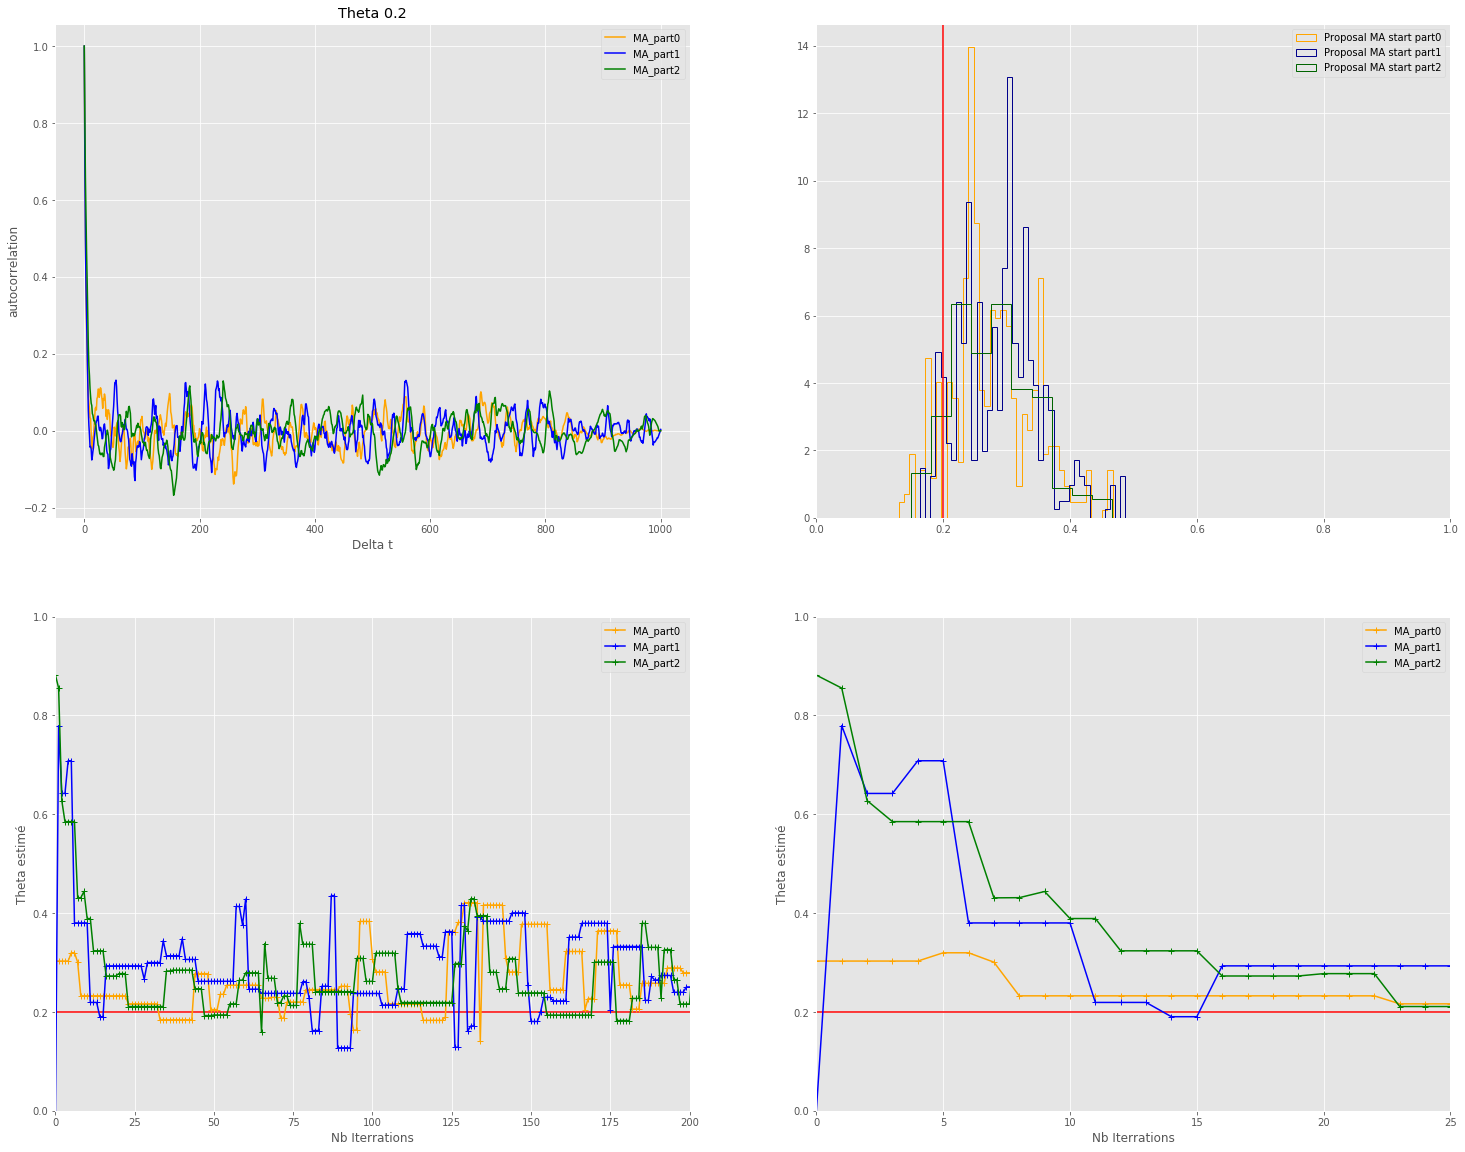

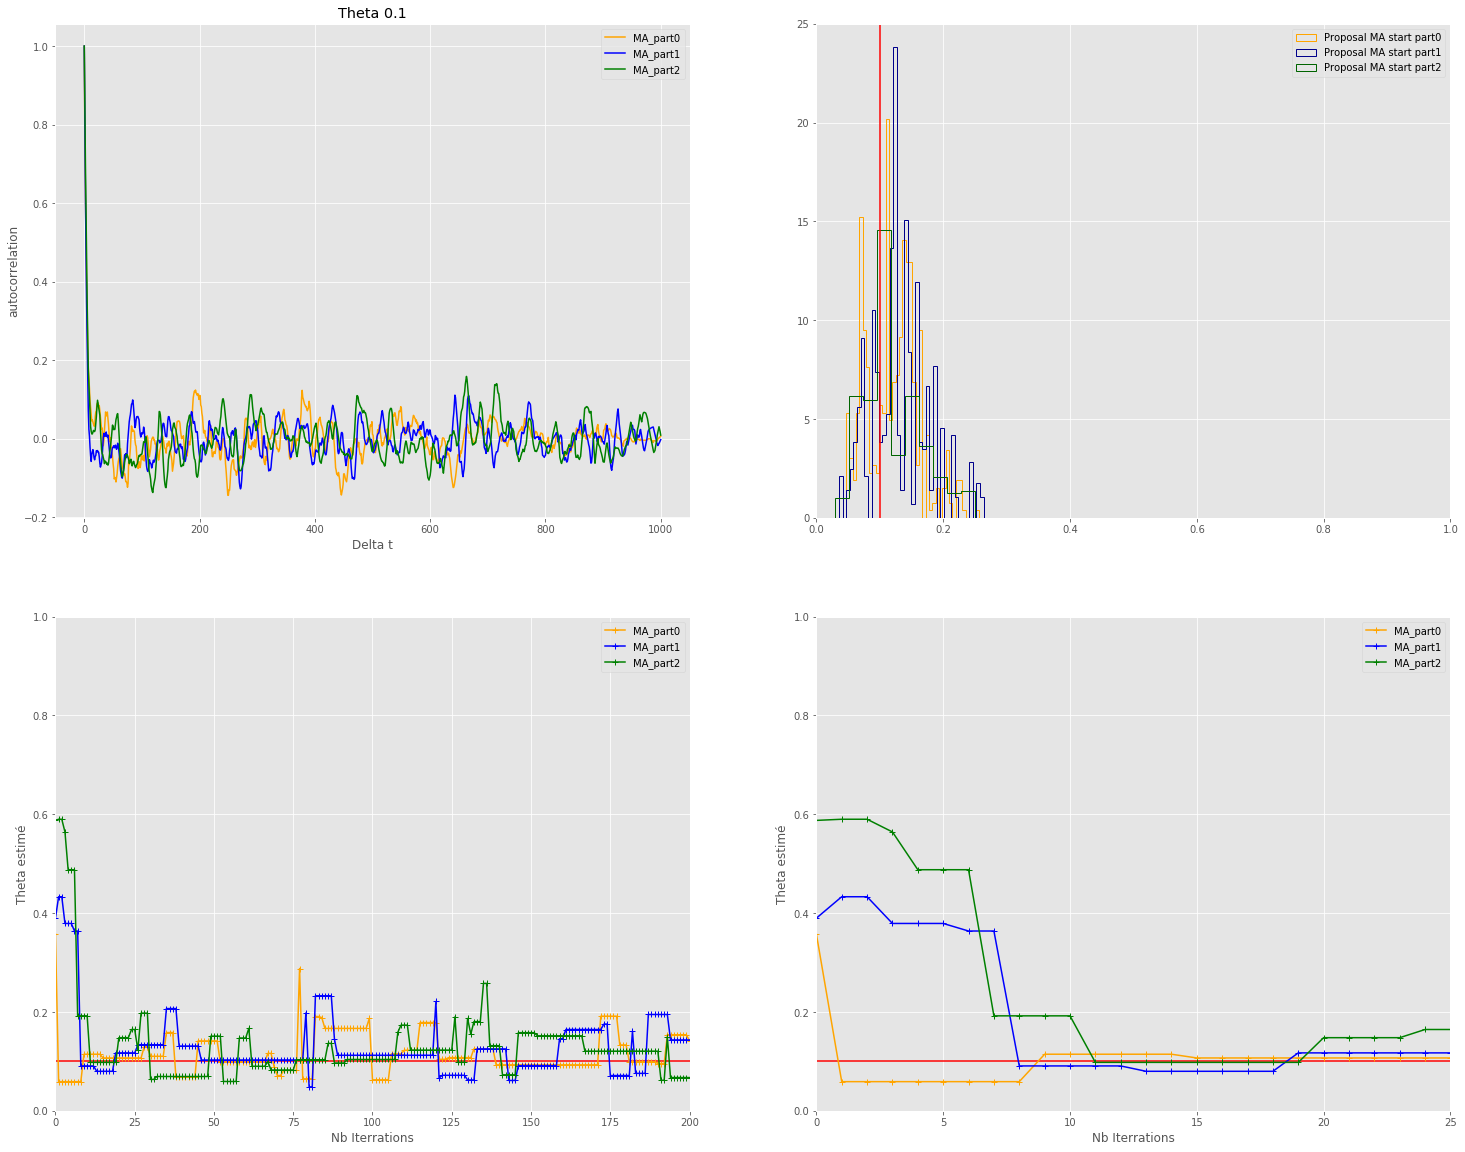

In [164]:
nmcmc = len(thetas_MH_MA_0[0])//2

for i in range(part0[0].shape[0]):
    plt.figure(figsize=(25, 20))
    plt.title('Theta '+str(thetas[i]))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Theta '+str(thetas[i]))
    notrend_samples_MA_theta_0 = detrend(np.array(thetas_MH_MA_0[i]))
    cor = acf(notrend_samples_MA_theta_0,nlags=2000)
    plt.plot(cor, c ='orange', label ='MA_part0')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_theta_1 = detrend(np.array(thetas_MH_MA_1[i]))
    cor = acf(notrend_samples_MA_theta_1, nlags=2000)
    plt.plot(cor, c ='blue', label ='MA_part1')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_theta_2 = detrend(np.array(thetas_MH_MA_2[i]))
    cor = acf(notrend_samples_MA_theta_2, nlags=2000)
    plt.plot(cor, c='green',label ='MA_part2')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    plt.legend()
    
    
    ###Fig Densité
    
    plt.subplot(2,2,2)

    plt.axvline(x=thetas[i], color='r')

    plt.hist(thetas_MH_MA_0[i][nmcmc:], 40 ,histtype='step',color = 'orange', density=True, linewidth=1, label='Proposal MA start part0');
    plt.hist(thetas_MH_MA_1[i][nmcmc:], 40 ,histtype='step',color = 'darkblue', density=True, linewidth=1, label='Proposal MA start part1');
    plt.hist(thetas_MH_MA_2[i][nmcmc:] ,histtype='step',color = 'darkgreen', density=True, linewidth=1, label='Proposal MA start part2');

    plt.legend()
    plt.xlim([0,1]);

    
    ###Fig Chemin Particule long
    
    plt.subplot(2,2,3)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=thetas[i], color='r')

    plt.plot(np.array(thetas_MH_MA_0[i]), '-+',c='orange', label='MA_part0')
    plt.plot(np.array(thetas_MH_MA_1[i]), '-+',c='blue', label='MA_part1')
    plt.plot(np.array(thetas_MH_MA_2[i]), '-+',c='green', label='MA_part2')
    plt.xlim([0, 200])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")
    
    ###Fig Chemin Particule court
    
    plt.subplot(2,2,4)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=thetas[i], color='r')

    plt.plot(np.array(thetas_MH_MA_0[i]), '-+',c='orange', label='MA_part0')
    plt.plot(np.array(thetas_MH_MA_1[i]), '-+',c='blue', label='MA_part1')
    plt.plot(np.array(thetas_MH_MA_2[i]), '-+',c='green', label='MA_part2')
    plt.xlim([0, 25])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")

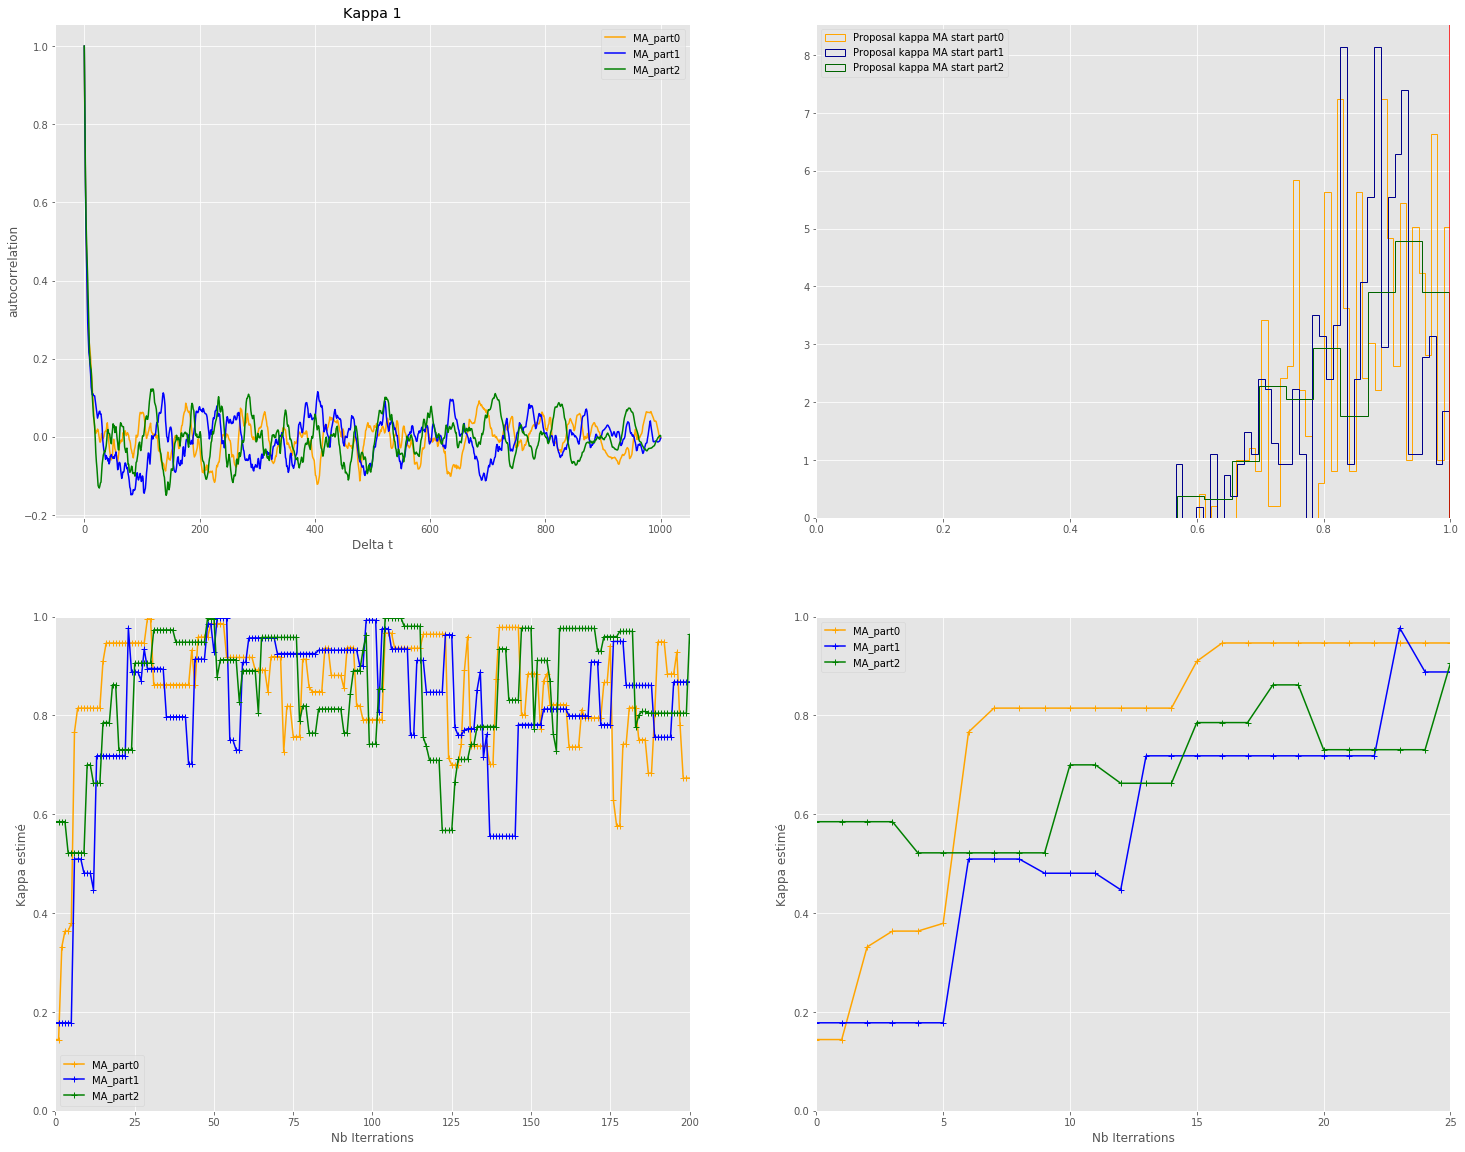

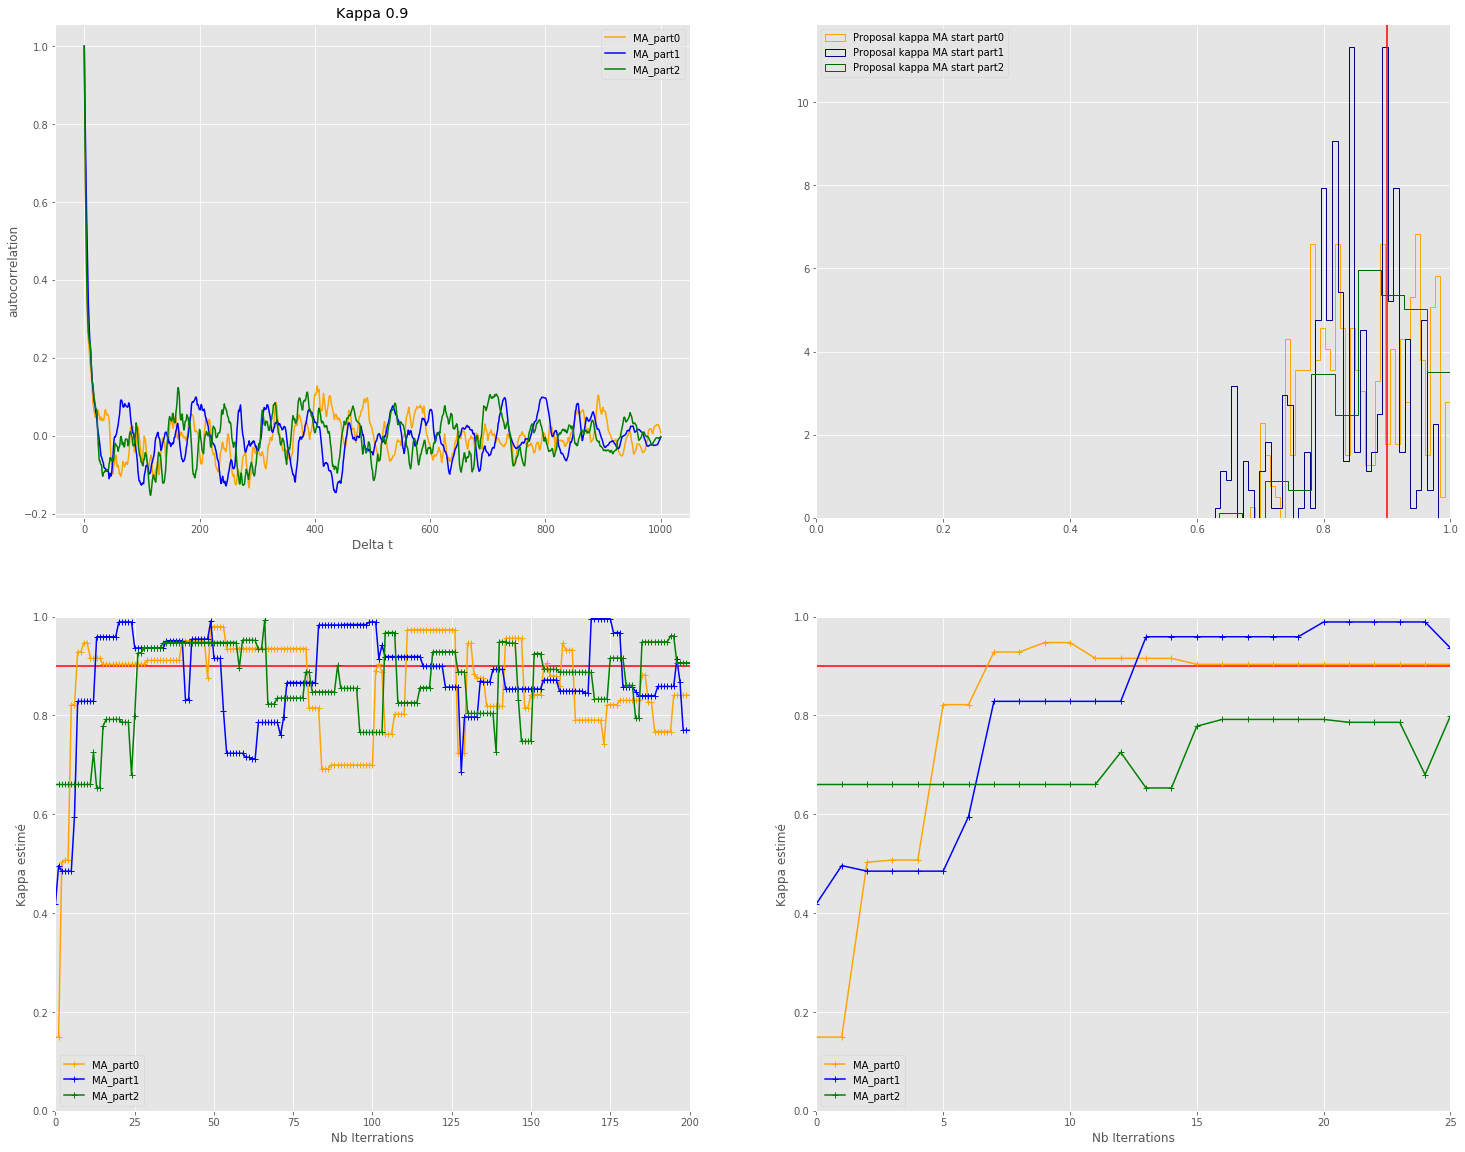

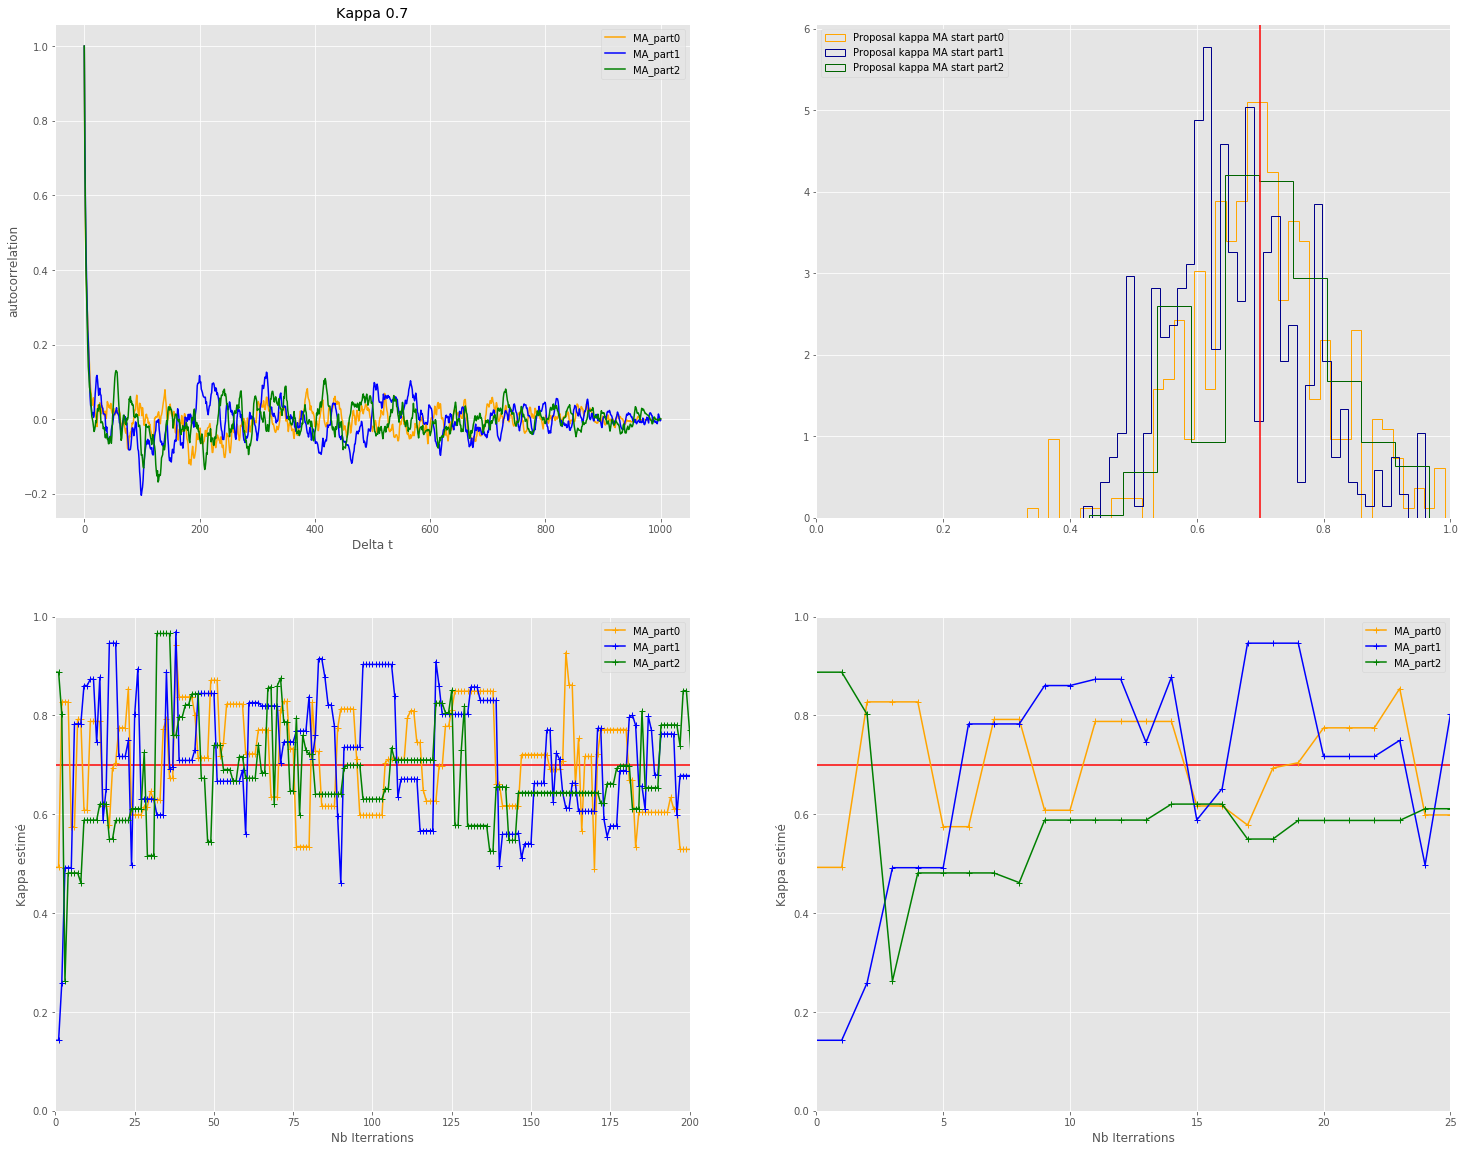

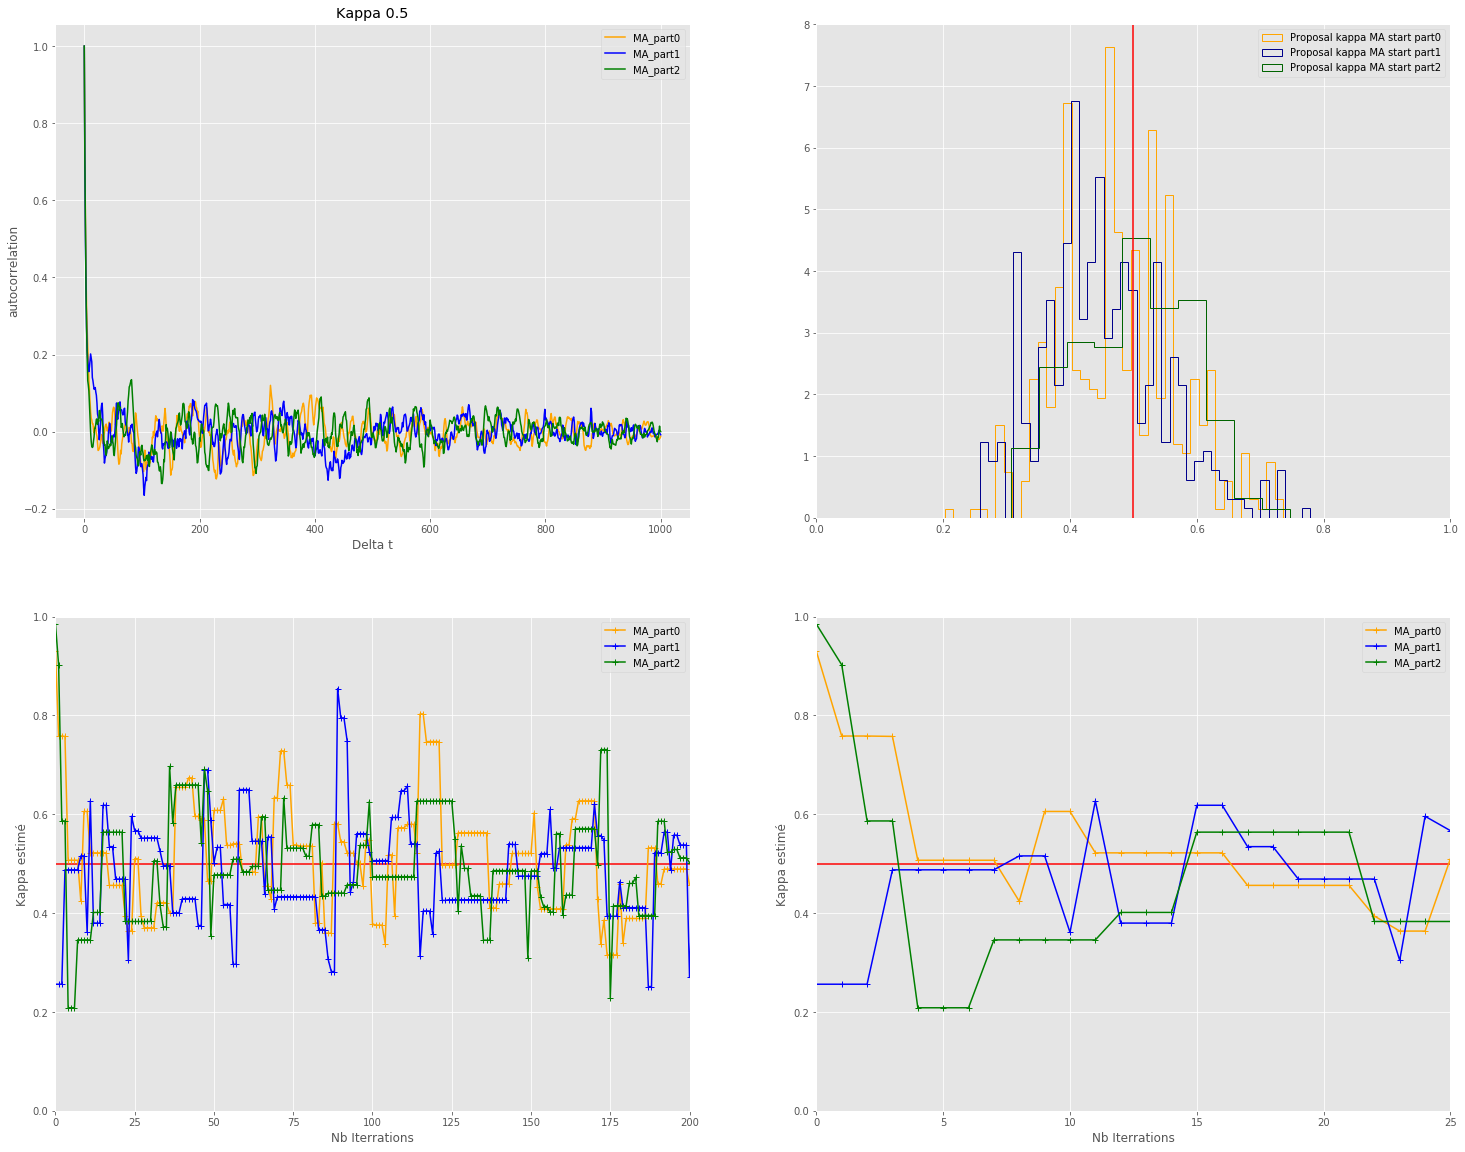

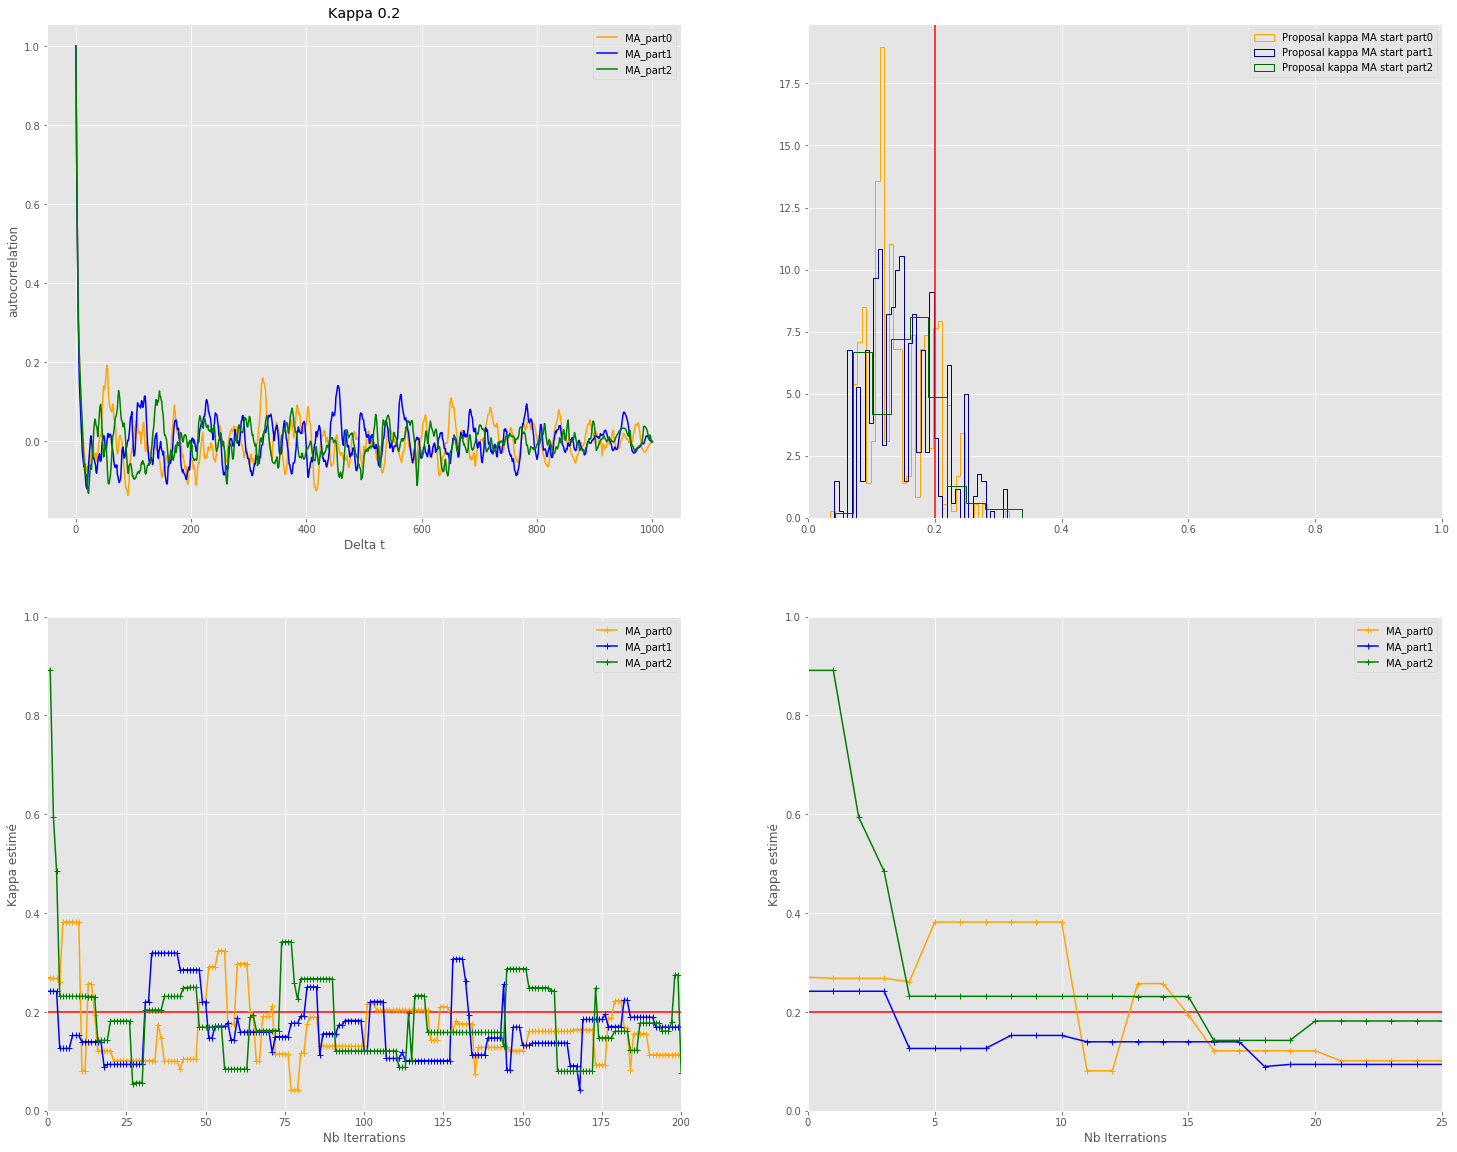

In [165]:
nmcmc = len(kappas_MH_MA_0[0])//2

for i in range(part0[1].shape[0]):
    plt.figure(figsize=(25, 20))
    plt.title('Kappa '+str(kappas[i]))
    ###Fig Autocor
    plt.subplot(2,2,1)
    plt.title('Kappa '+str(kappas[i]))
    notrend_samples_MA_kappas_0 = detrend(np.array(kappas_MH_MA_0[i]))
    cor = acf(notrend_samples_MA_kappas_0,nlags=2000)
    plt.plot(cor, c ='orange', label ='MA_part0')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_kappas_1 = detrend(np.array(kappas_MH_MA_1[i]))
    cor = acf(notrend_samples_MA_kappas_1, nlags=2000)
    plt.plot(cor, c ='blue', label ='MA_part1')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")

    notrend_samples_MA_kappas_2 = detrend(np.array(kappas_MH_MA_2[i]))
    cor = acf(notrend_samples_MA_kappas_2,nlags=2000)
    plt.plot(cor, c='green',label ='MA_part2')
    plt.ylabel("autocorrelation")
    plt.xlabel("Delta t")
    plt.legend()
    
    
    ###Fig Densité
    
    plt.subplot(2,2,2)

    plt.axvline(x=kappas[i], color='r')

    plt.hist(kappas_MH_MA_0[i][nmcmc:], 40 ,histtype='step',color = 'orange', density=True, linewidth=1, label='Proposal kappa MA start part0');
    plt.hist(kappas_MH_MA_1[i][nmcmc:], 40 ,histtype='step',color = 'darkblue', density=True, linewidth=1, label='Proposal kappa MA start part1');
    plt.hist(kappas_MH_MA_2[i][nmcmc:] ,histtype='step',color = 'darkgreen', density=True, linewidth=1, label='Proposal kappa MA start part2');

    plt.legend()
    plt.xlim([0,1]);

    
    ###Fig Chemin Particule long
    
    plt.subplot(2,2,3)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=kappas[i], color='r')

    plt.plot(np.array(kappas_MH_MA_0[i]), '-+',c='orange', label='MA_part0')
    plt.plot(np.array(kappas_MH_MA_1[i]), '-+',c='blue', label='MA_part1')
    plt.plot(np.array(kappas_MH_MA_2[i]), '-+',c='green', label='MA_part2')
    plt.xlim([0, 200])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")
    
    ###Fig Chemin Particule court
    
    plt.subplot(2,2,4)
    #plt.title('Theta '+ str(thetas[i]))
    plt.axhline(y=kappas[i], color='r')

    plt.plot(np.array(kappas_MH_MA_0[i]), '-+',c='orange', label='MA_part0')
    plt.plot(np.array(kappas_MH_MA_1[i]), '-+',c='blue', label='MA_part1')
    plt.plot(np.array(kappas_MH_MA_2[i]), '-+',c='green', label='MA_part2')
    plt.xlim([0, 25])
    plt.ylim([0, 1]);
    plt.legend()
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")

#### Matrices 

In [75]:
theta_mat=np.mat(thetas)
kappa_mat=np.mat(kappas)

In [97]:
M_etoile = np.dot(np.transpose(theta_mat),kappa_mat)
print (theta_mat)
print (kappa_mat)
print (M_etoile)

[[0.9 0.7 0.2 0.2 0.1]]
[[1.  0.9 0.7 0.5 0.2]]
[[0.9  0.81 0.63 0.45 0.18]
 [0.7  0.63 0.49 0.35 0.14]
 [0.2  0.18 0.14 0.1  0.04]
 [0.2  0.18 0.14 0.1  0.04]
 [0.1  0.09 0.07 0.05 0.02]]


In [154]:
def esperance_coef(samples) :
    nb_coef = len(samples)
    vect_esp = np.ones((1,nb_coef))
    for i in range(len(samples)) :
        estim_sample = samples[i]
        nmcmc = len(estim_sample)//2
        vect_esp[0,i] = np.mean(estim_sample[nmcmc:])
    return vect_esp
    

In [155]:
def esperance_matrice(samples):
    lis_mat = []
    for i in range(len(samples)):
        theta_mat=np.mat(samples[i][0])
        kappa_mat=np.mat(samples[i][1])
        mat =  np.dot(np.transpose(theta_mat),kappa_mat)
        lis_mat.append(mat)
    n = np.array(lis_mat)
    return np.mean(n, axis=0)

In [156]:
theta_chap_0 = esperance_coef(thetas_MH_MA_0)
kappas_chap_0 = esperance_coef(kappas_MH_MA_0)
Mat_chap_0 = np.dot(np.transpose(theta_chap_0),kappas_chap_0)
print("Mat_chap_0")
print(Mat_chap_0)


theta_chap_1 = esperance_coef(thetas_MH_MA_1)
kappas_chap_1 = esperance_coef(kappas_MH_MA_1)
Mat_chap_1 = np.dot(np.transpose(theta_chap_1),kappas_chap_1)
print("Mat_chap_1")
print(Mat_chap_1)


theta_chap_2 = esperance_coef(thetas_MH_MA_2)
kappas_chap_2 = esperance_coef(kappas_MH_MA_2)
Mat_chap_2 = np.dot(np.transpose(theta_chap_2),kappas_chap_2)
print("Mat_chap_2")
print(Mat_chap_2)



Mat_chap_0
[[0.765  0.7645 0.6211 0.4234 0.1294]
 [0.5413 0.541  0.4395 0.2996 0.0916]
 [0.2042 0.2041 0.1658 0.113  0.0345]
 [0.2387 0.2385 0.1938 0.1321 0.0404]
 [0.1045 0.1044 0.0848 0.0578 0.0177]]
Mat_chap_1
[[0.7769 0.7703 0.6062 0.4145 0.1365]
 [0.5585 0.5538 0.4358 0.298  0.0981]
 [0.2113 0.2095 0.1649 0.1127 0.0371]
 [0.2459 0.2438 0.1919 0.1312 0.0432]
 [0.1111 0.1101 0.0867 0.0593 0.0195]]
Mat_chap_2
[[0.7452 0.7706 0.6206 0.4329 0.1334]
 [0.5332 0.5513 0.444  0.3097 0.0954]
 [0.2021 0.209  0.1683 0.1174 0.0362]
 [0.2386 0.2467 0.1987 0.1386 0.0427]
 [0.104  0.1076 0.0867 0.0604 0.0186]]


In [112]:
print (M_etoile)

[[0.9  0.81 0.63 0.45 0.18]
 [0.7  0.63 0.49 0.35 0.14]
 [0.2  0.18 0.14 0.1  0.04]
 [0.2  0.18 0.14 0.1  0.04]
 [0.1  0.09 0.07 0.05 0.02]]


In [157]:
Mat_0 = esperance_matrice(samples_MA_0)
print ("Mat_0")
print (Mat_0)

Mat_1 = esperance_matrice(samples_MA_1)
print ("Mat_1")
print (Mat_1)

Mat_2 = esperance_matrice(samples_MA_2)
print ("Mat_2")
print (Mat_2)

Mat_0
[[0.768  0.7647 0.6186 0.4311 0.132 ]
 [0.5411 0.5415 0.4368 0.3035 0.0933]
 [0.2062 0.2058 0.1666 0.1167 0.0355]
 [0.235  0.235  0.1899 0.1316 0.0405]
 [0.1018 0.1016 0.0821 0.0571 0.0174]]
Mat_1
[[0.7481 0.7607 0.6064 0.4135 0.1374]
 [0.5377 0.5492 0.4365 0.2977 0.0992]
 [0.2042 0.2081 0.1658 0.1127 0.0376]
 [0.2383 0.2446 0.1939 0.133  0.0441]
 [0.1091 0.1121 0.0889 0.061  0.0207]]
Mat_2
[[0.7549 0.7667 0.6118 0.4295 0.143 ]
 [0.5341 0.5444 0.4337 0.304  0.1018]
 [0.2063 0.2104 0.1684 0.1181 0.0403]
 [0.242  0.2471 0.1968 0.1391 0.047 ]
 [0.1072 0.1096 0.0872 0.0616 0.0213]]


### Chemin de la particule

In [32]:
%time sampless_MA= [Metro_hast (proposals_MA, targets,[np.ones(5)*theta_init, np.ones(5)*theta_init], 100) for theta_init in np.arange(0.1, 1, 0.2)]


Wall time: 1min 9s


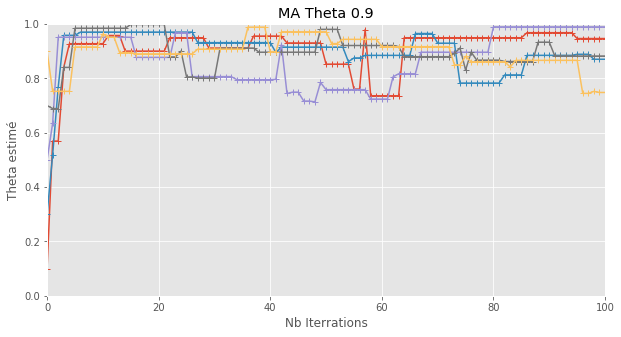

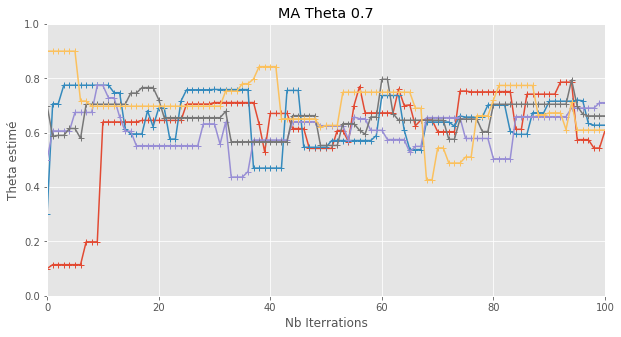

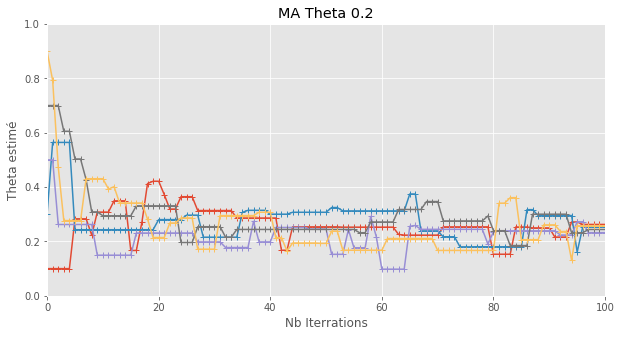

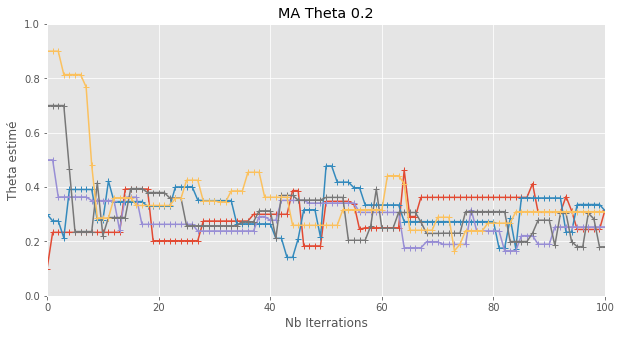

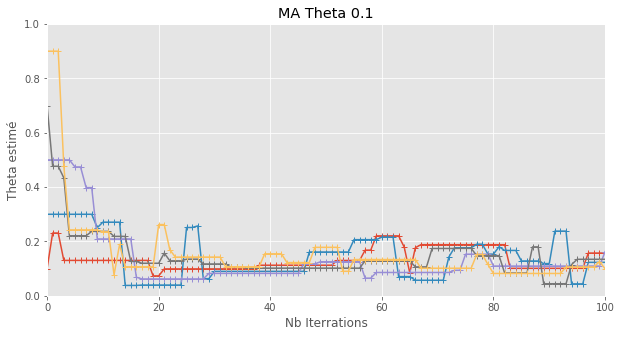

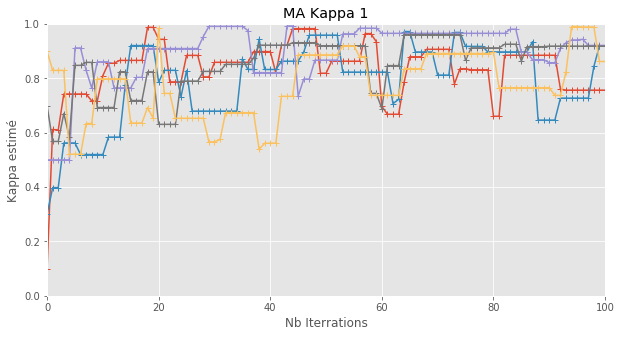

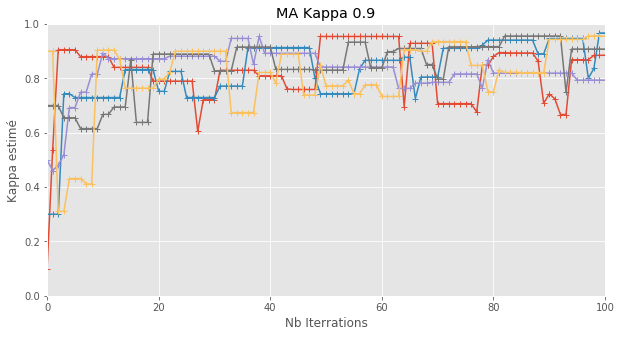

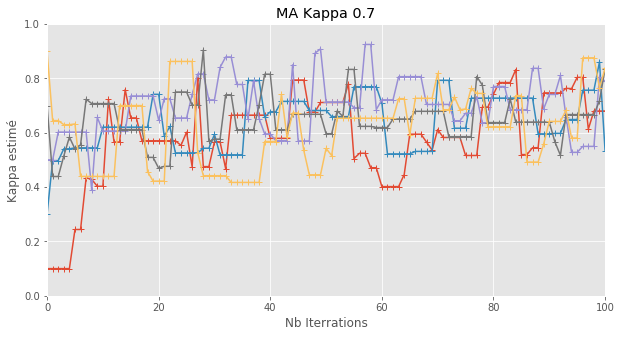

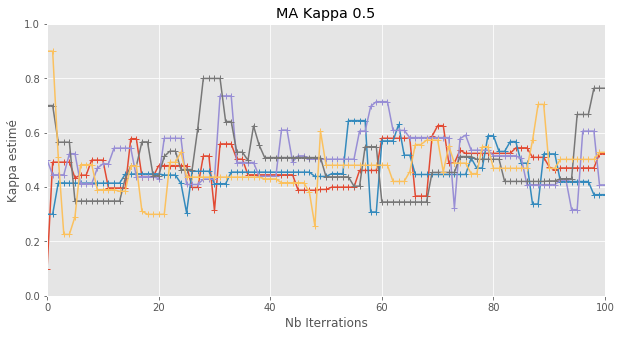

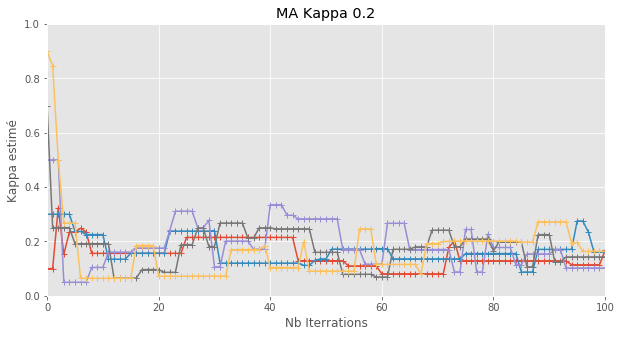

In [52]:
for i in range(part0[0].shape[0]) :
    plt.figure(figsize=(10, 5))
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Theta estimé")
    for samples in sampless_MA :
        
        #### MP
        plt.title('MA '+'Theta '+ str(thetas[i])) 
        thetas_MH_MA, kappas_MH_MA = split_sample(samples)
        plt.plot(np.array(thetas_MH_MA[i]), '-+')
        plt.xlim([0, 100]);
        plt.ylim([0, 1]);
        
    
for i in range(part0[1].shape[0]) :
    plt.figure(figsize=(10, 5))
    plt.xlabel("Nb Iterrations")
    plt.ylabel("Kappa estimé")
    for samples in sampless_MA :
        
        #### MP
        plt.title('MA '+'Kappa '+ str(kappas[i])) 
        thetas_MH_MA, kappas_MH_MA = split_sample(samples)
        plt.plot(np.array(kappas_MH_MA[i]), '-+')
        plt.xlim([0, 100]);
        plt.ylim([0, 1]);
        
        
        